# <font size='8px'><font color='#FF6546'>**Project Name**    - <font color='#3792cb'>Uber Analysis 



## ***Uber Data Analysis Summary***

***This project analyzes Uber ride data with 2 main goals:***  

Firstly, to perform exploratory data analysis (EDA) on pricing trends, peak hours, and key factors effecting price -including time, day, month, hour, car type, weather conditions=>n order to uncover patterns in user behavior.  
Secondly, build machine learning models to accurately predict ride datas based on these factors  


***The ultimate objective is to generate data-driven insights and recommendations that help improve customer experience and support smarter business decisions.***



# 1. Data Overview

### Import Libraries

In [340]:
import pandas as pd
import numpy as np
import time,datetime
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [341]:
# Load Dataset 
df=pd.read_csv(r"D:\DATA\Data\U\02 Python\02 Project\CV\14.Uber_d\rideshare_kaggle.csv")

### Dataset First View

In [342]:
# Dataset First Look
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


### Dataset Information

Since there are more than 55 columns in this dataset, there are many that might be useless for our simple use case. So we can just drop the extra columns and work with the rest.

In [343]:
# Drop useless columns
extra_cols = ['id','product_id','timestamp','apparentTemperature','long_summary',
        'windGustTime','temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime','timezone',]
df.drop(columns=extra_cols, axis=1,inplace=True)

### Overall data exploration and cleaning

In [344]:
# Check for null data
print(df.isnull().sum().sort_values(ascending=False))

price                55095
hour                     0
month                    0
day                      0
datetime                 0
source                   0
cab_type                 0
destination              0
name                     0
distance                 0
surge_multiplier         0
latitude                 0
longitude                0
temperature              0
short_summary            0
precipIntensity          0
precipProbability        0
humidity                 0
windSpeed                0
windGust                 0
visibility               0
icon                     0
dewPoint                 0
pressure                 0
windBearing              0
cloudCover               0
uvIndex                  0
moonPhase                0
dtype: int64


<Axes: >

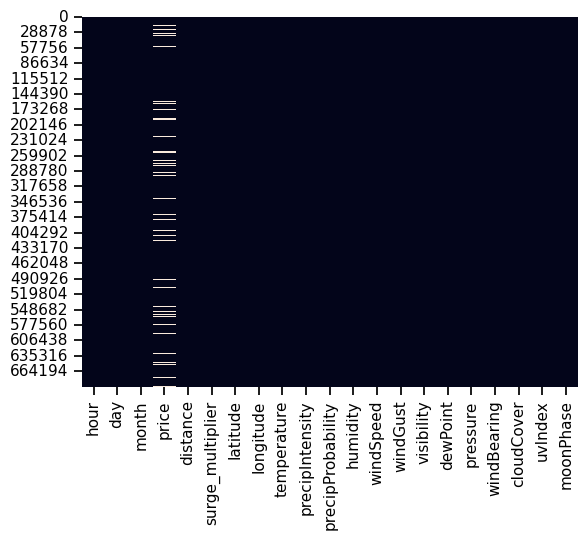

In [345]:
# Visualizing the missing values
sns.heatmap(df.select_dtypes(exclude=['object','datetime64[ns]']).isnull(),cbar=False)

In [346]:
#Fill null values with mean value
df['price']=df['price'].fillna(df['price'].mean())
df['price'].isnull().sum()

np.int64(0)

In [347]:
# Checkduplicate value
print(df.duplicated().sum())

1493


In [348]:
# Drop checkduplicate value
df.drop_duplicates(inplace=True)

In [349]:
# Checkduplicate value again
print(df.duplicated().sum())

0


In [350]:
# Time Data Conversion and Classification
df['datetime']=pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S')
df['day_name']=df['datetime'].dt.day_name()
df['day_night']=pd.cut(df['hour'],bins = [0,8,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])
df['price_per_mile']=df['price']/df['distance']
df['price_per_mile'].isnull().sum()

np.int64(0)

In [351]:
# check datatype of each column
df['day_night'] = df['day_night'].astype('object')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 691578 entries, 0 to 693070
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   hour               691578 non-null  int64         
 1   day                691578 non-null  int64         
 2   month              691578 non-null  int64         
 3   datetime           691578 non-null  datetime64[ns]
 4   source             691578 non-null  object        
 5   destination        691578 non-null  object        
 6   cab_type           691578 non-null  object        
 7   name               691578 non-null  object        
 8   price              691578 non-null  float64       
 9   distance           691578 non-null  float64       
 10  surge_multiplier   691578 non-null  float64       
 11  latitude           691578 non-null  float64       
 12  longitude          691578 non-null  float64       
 13  temperature        691578 non-null  float64      

In [352]:
#descriptive statistics
df.describe()

,hour,day,month,datetime,price,distance,surge_multiplier,latitude,longitude,temperature,...,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,moonPhase,price_per_mile
count,691578.000000,691578.000000,691578.000000,691578,691578.000000,691578.000000,691578.000000,691578.000000,691578.000000,691578.000000,...,691578.000000,691578.000000,691578.000000,691578.000000,691578.000000,691578.000000,691578.000000,691578.000000,691578.000000,691578.000000
mean,11.619298,17.787593,11.587111,2018-12-05 21:43:50.091410688,16.547859,2.189941,1.013900,42.338173,-71.066151,39.583689,...,6.185354,8.469050,8.468378,31.654444,1010.104861,220.060564,0.686447,0.249000,0.578976,9.814803
min,0.000000,1.000000,11.000000,2018-11-26 03:40:46,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.450000,0.800000,0.717000,4.390000,988.090000,2.000000,0.000000,0.000000,0.090000,0.556586
25%,6.000000,13.000000,11.000000,2018-11-28 22:29:08,9.500000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,3.410000,4.060000,8.432000,27.490000,999.840000,124.000000,0.370000,0.000000,0.300000,4.807692
50%,12.000000,17.000000,12.000000,2018-12-02 08:03:01,16.000000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,5.910000,7.550000,9.880000,30.690000,1009.250000,258.000000,0.820000,0.000000,0.680000,7.500000
75%,18.000000,28.000000,12.000000,2018-12-14 22:50:05,22.500000,2.930000,1.000000,42.364700,-71.054200,43.580000,...,8.410000,11.740000,9.996000,38.120000,1021.860000,303.000000,1.000000,0.000000,0.790000,11.666667
max,23.000000,30.000000,12.000000,2018-12-18 19:15:10,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,15.000000,27.250000,10.000000,50.670000,1035.550000,356.000000,1.000000,2.000000,0.930000,1375.000000
std,6.947432,9.982174,0.492354,NaN,8.950645,1.139030,0.091738,0.047839,0.020302,6.727399,...,3.148603,5.290172,2.602638,9.143367,13.471383,99.106817,0.358558,0.474192,0.244766,14.340034


### Dataset Rows & Columns count

In [353]:
# Row,Column Informations
print('Number rows of datasets:',df.shape[0])
print('Number features of datasets:',df.shape[1])

Number rows of datasets: 691578
Number features of datasets: 31


### What did you know about your dataset?

The dataset contains 691578 observations and 31 features.

The Price column has 55095 missing values which were handled using the median imputation method.

There are 1,493 duplicate rows in the dataset.

The 'Date' column is currently of object data type; it should be converted to datetime for accurate time-based analysis.

New time-related columns were extracted from the Date column to provide clearer insights (e.g., day_night,day_name).

# 2. Exploratory Data Analysis (EDA)

In [354]:
# Dataset Columns
print(f'Features: {df.columns.to_list()}')

Features: ['hour', 'day', 'month', 'datetime', 'source', 'destination', 'cab_type', 'name', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'short_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'moonPhase', 'day_name', 'day_night', 'price_per_mile']


### Understanding about Variables

***Time and Date information***  

hour: The hour of the ride request (0–23).

day: The day of the month (1–31).

month: The month of the year (specificly 11–12).

datetime: The full timestamp when the ride request was made.

day_name: The name of the day (e.g., Monday, Tuesday).

day_night: Part of the day (e.g., "day" or "night").

***Location Information***  

source: Starting point or pickup location of the ride.

destination: Ending point or drop-off location of the ride.

latitude: Latitude of the pickup location.

longitude: Longitude of the pickup location.

***Ride Information***  

cab_type: Type of cab (e.g., Uber, Lyft).

name: Specific ride option (e.g., UberX, Lyft Premier).

distance: Distance of the ride (likely in miles or kilometers).

price: Actual price charged for the ride.

surge_multiplier: Price multiplier due to high demand.

price_per_mile: Price divided by distance (cost per mile).

***Weather Conditions***  

temperature: Temperature at the time of the ride (likely in °F or °C).

short_summary: Brief weather description (e.g., Clear, Rainy).

precip_intensity: How intense the precipitation is (e.g., rain amount).

precipitation_prob: Probability of precipitation (0–1).

humidity: Humidity percentage (0–1).

windspeed: Wind speed at the time of the ride.

visibility: How clear the air is (in miles or kilometers).

icon: Weather icon name (e.g., clear-day, rain).

dewpoint: Temperature at which dew forms; reflects humidity.

pressure: Atmospheric pressure (in hPa or similar).

cloudcover: Portion of sky covered by clouds (0–1).

uv_index: UV radiation level (0+; higher = more risk of sunburn).

moonphase: Lunar phase (0 = new moon, 0.5 = full moon).



In [355]:
# Number unique value of each feature
for i in df.columns:
    print(f' feature {i} has {df[i].nunique()} unique values')

 feature hour has 24 unique values
 feature day has 17 unique values
 feature month has 2 unique values
 feature datetime has 31350 unique values
 feature source has 12 unique values
 feature destination has 12 unique values
 feature cab_type has 2 unique values
 feature name has 13 unique values
 feature price has 148 unique values
 feature distance has 549 unique values
 feature surge_multiplier has 7 unique values
 feature latitude has 11 unique values
 feature longitude has 12 unique values
 feature temperature has 308 unique values
 feature short_summary has 9 unique values
 feature precipIntensity has 63 unique values
 feature precipProbability has 29 unique values
 feature humidity has 51 unique values
 feature windSpeed has 291 unique values
 feature windGust has 286 unique values
 feature visibility has 227 unique values
 feature icon has 7 unique values
 feature dewPoint has 313 unique values
 feature pressure has 316 unique values
 feature windBearing has 195 unique values
 

In [356]:
### Analysis price by features
factors=['hour', 'day', 'month', 'source', 'destination',
       'cab_type', 'name', 'distance', 'latitude',
       'longitude', 'temperature', 'short_summary', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'moonPhase', 'day_name', 'day_night', 'price_per_mile']
def correlation(df,feature):
    for i,k in enumerate(factors):
        chart=df.groupby(k)[feature].mean().reset_index()
        plt.figure(figsize = (11,3.5))
        if df[k].dtypes=='object':
            ax=sns.barplot(x=k,y=feature,data=chart)
            plt.title(f'{feature} by {k}')
            for t in ax.containers:
                plt.bar_label(t,fmt='%.2f')
            plt.xticks(rotation=35)
        else:
            sns.scatterplot(x=k,y=feature,data=chart)
            correlation=df[k].corr(df[feature])
            plt.title(f'{feature} and ' + k + '----correlation: ' + str(round(correlation,4)));
        plt.show()

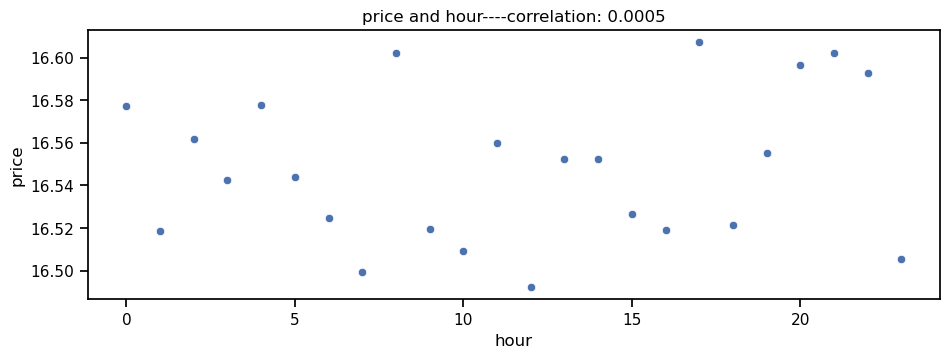

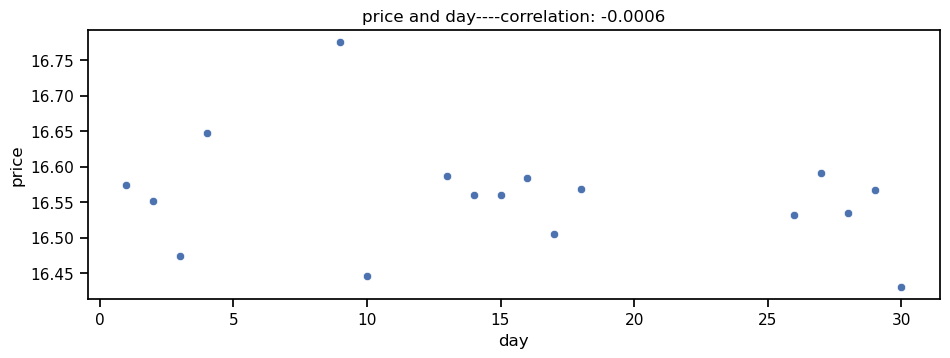

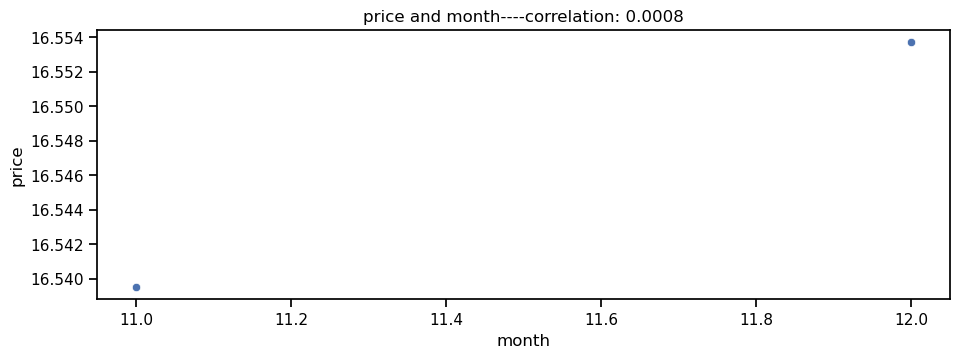

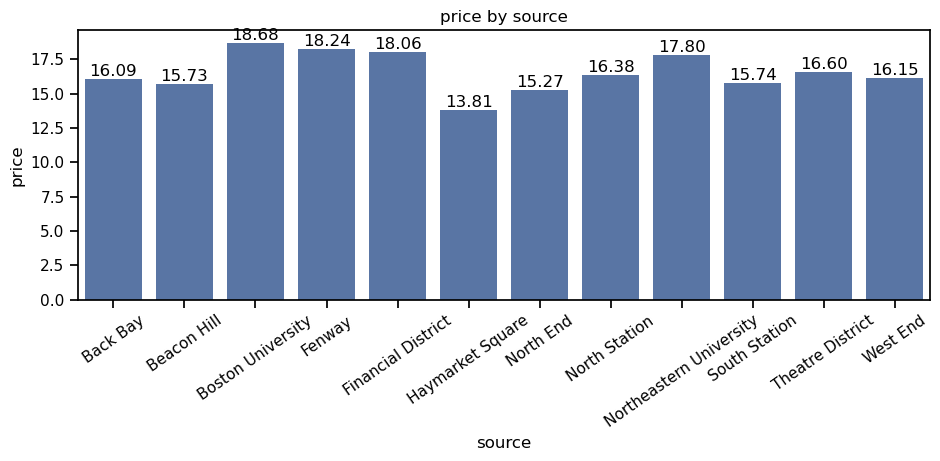

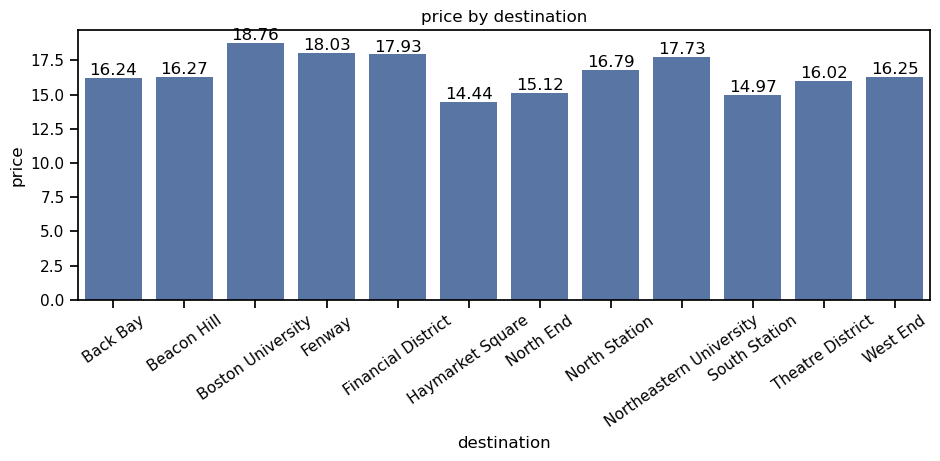

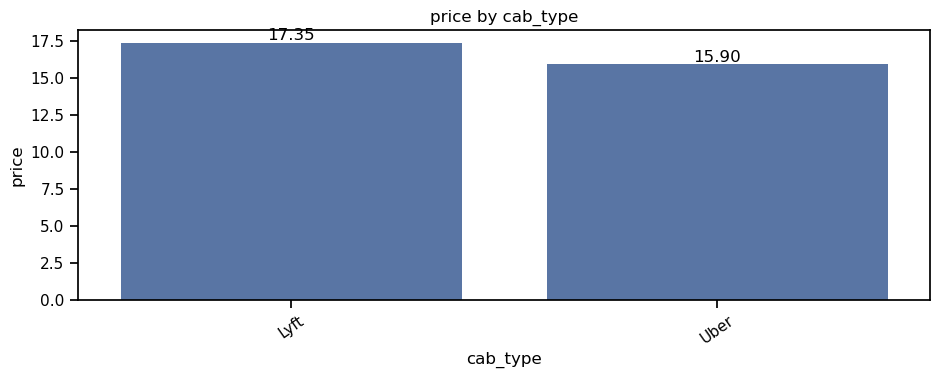

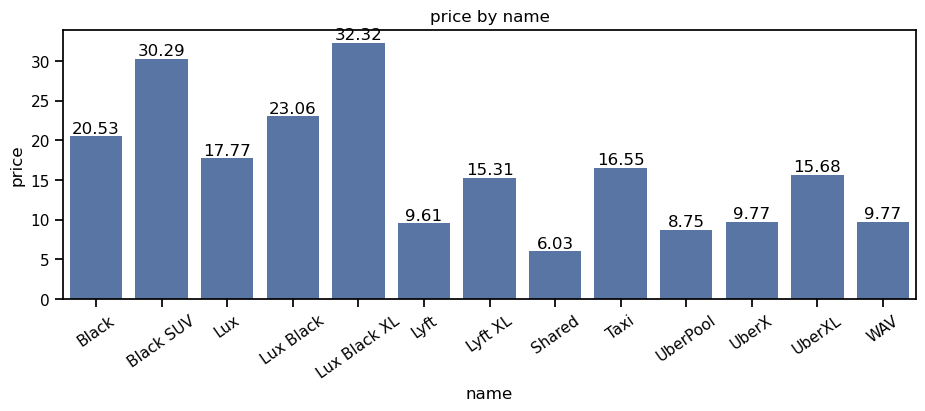

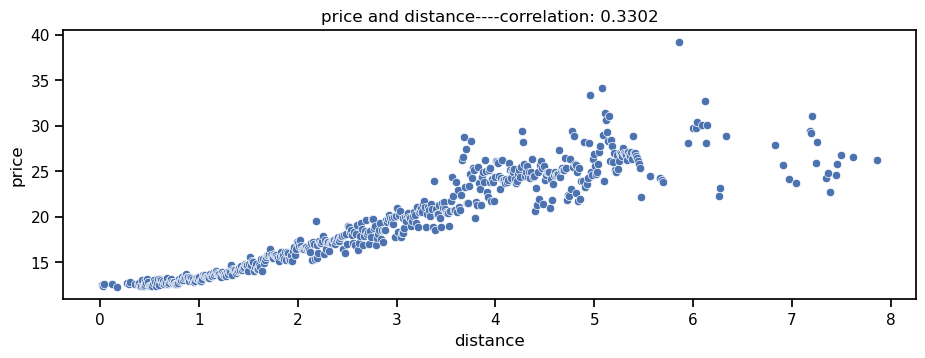

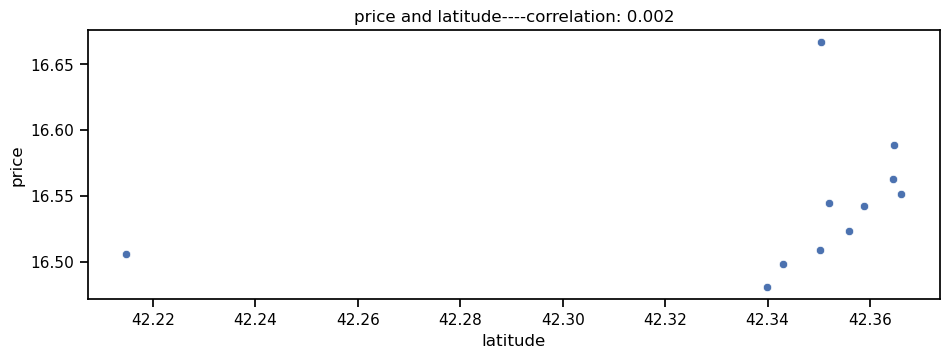

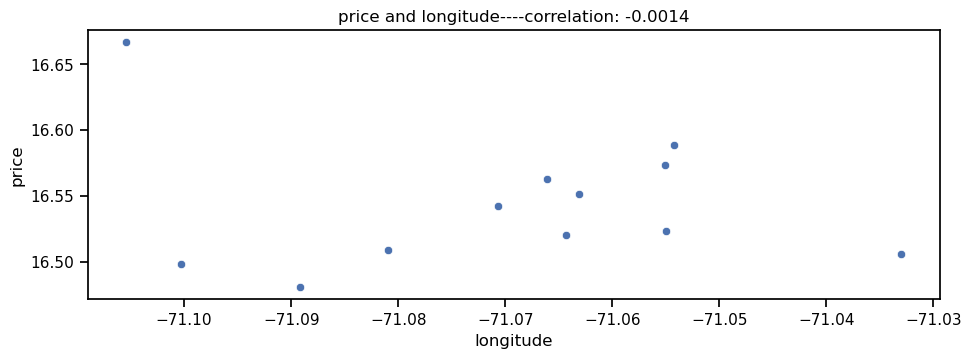

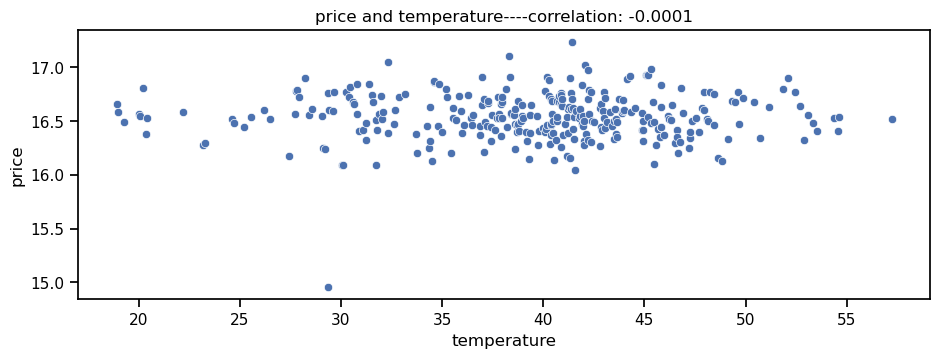

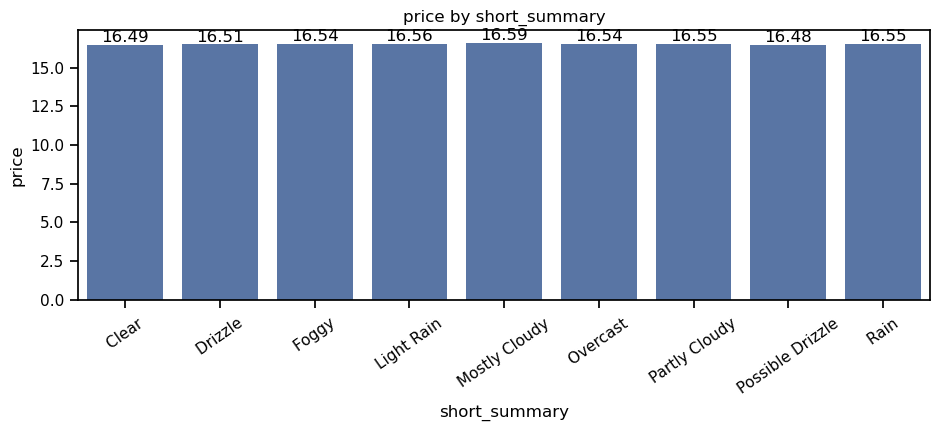

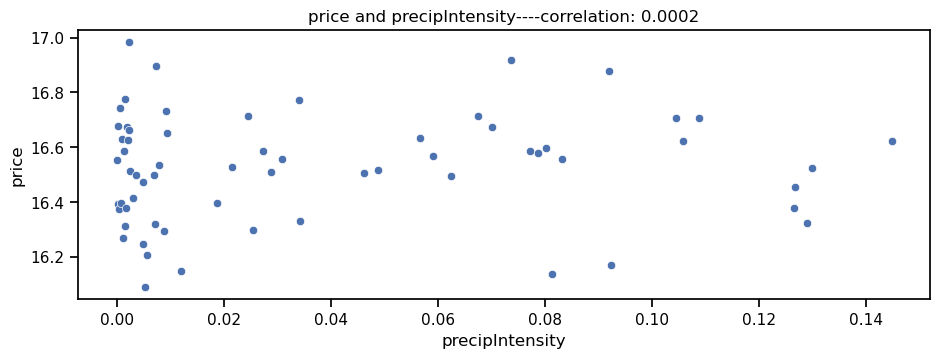

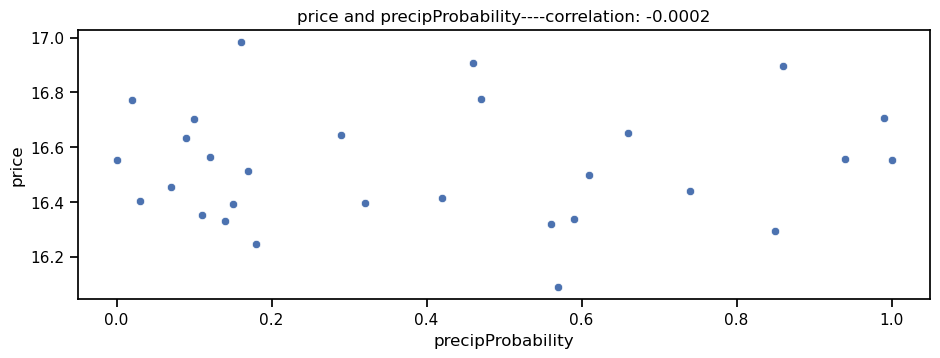

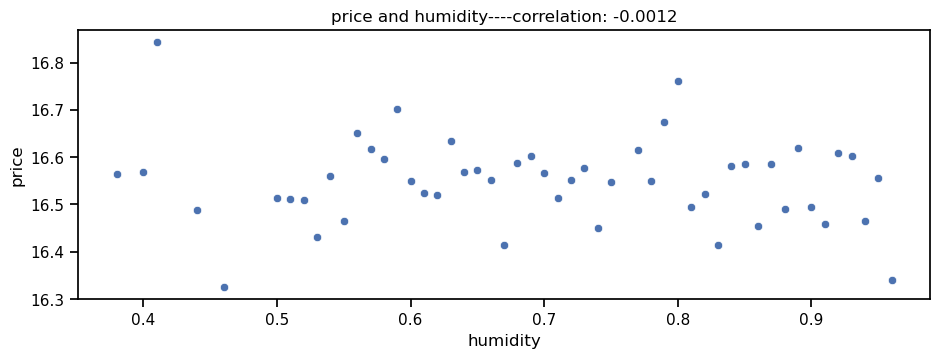

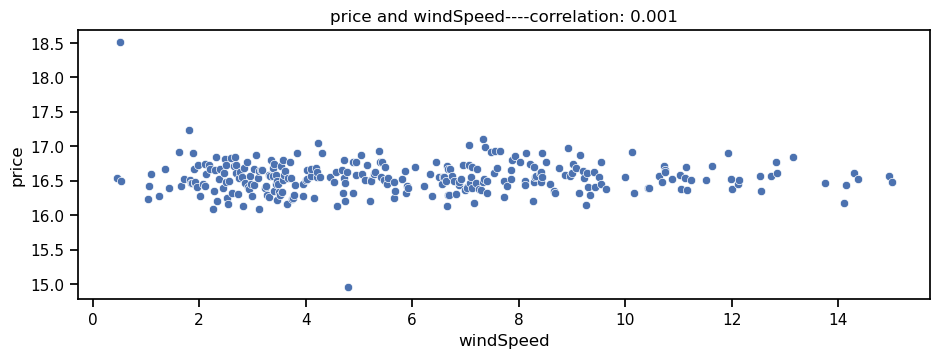

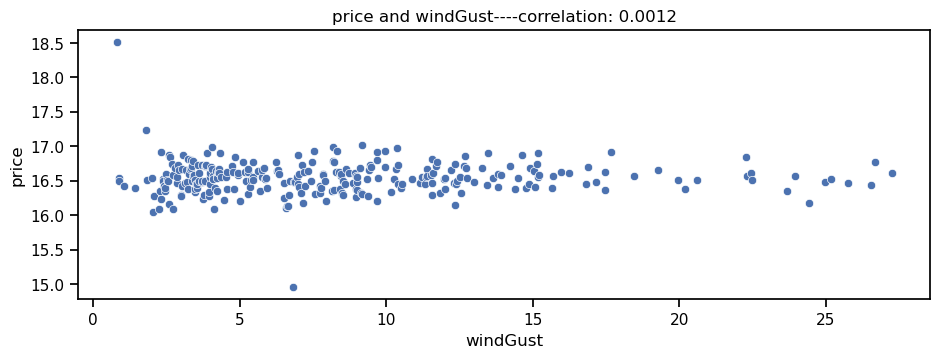

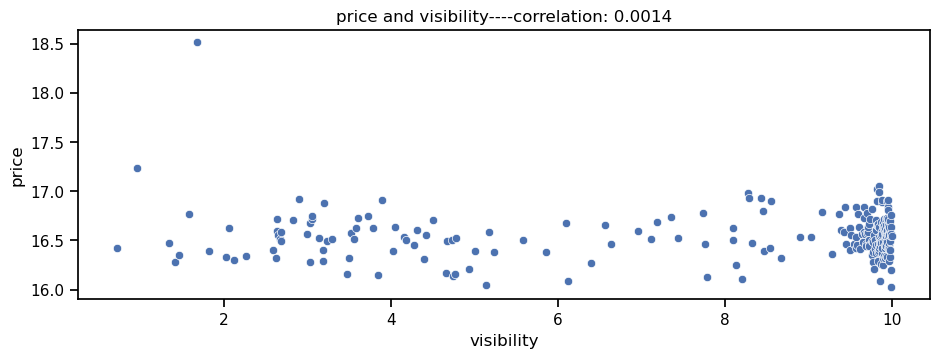

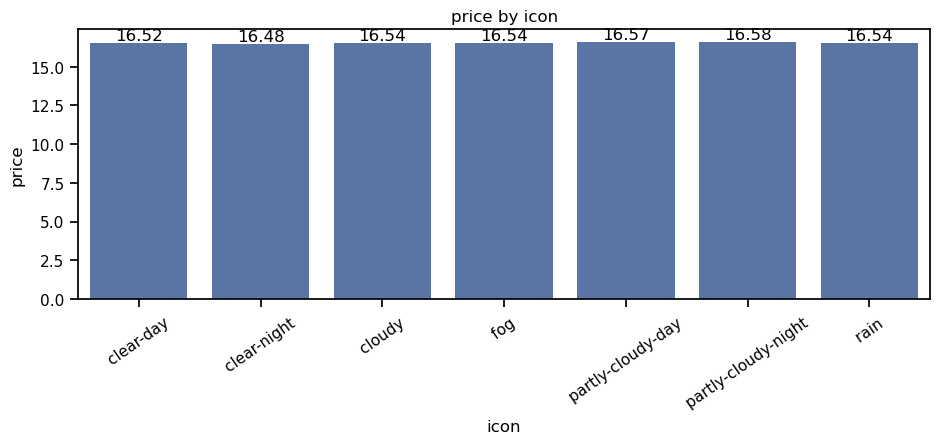

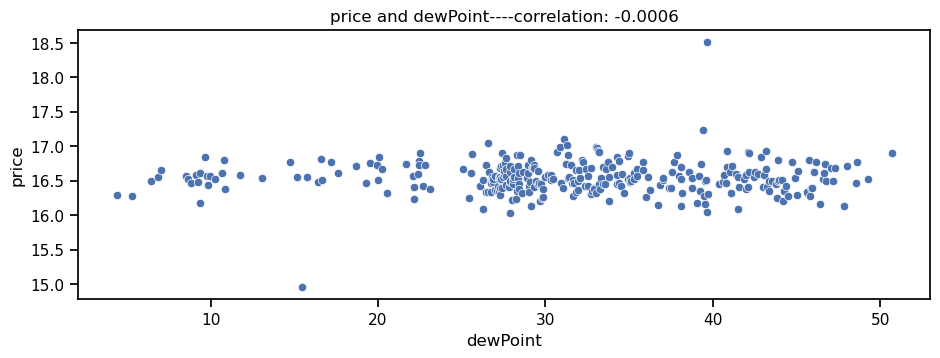

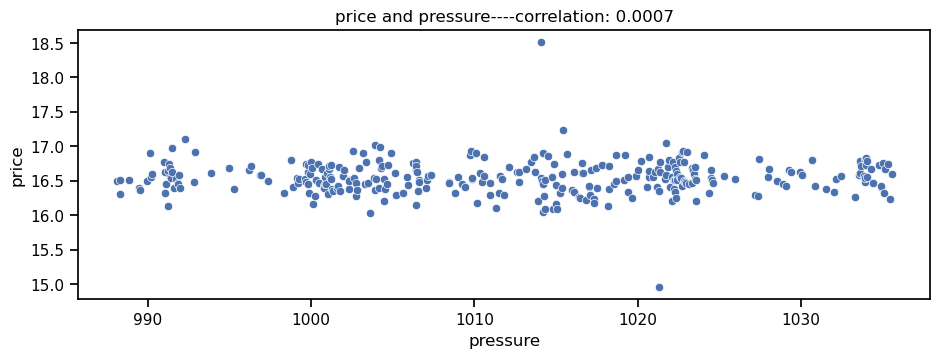

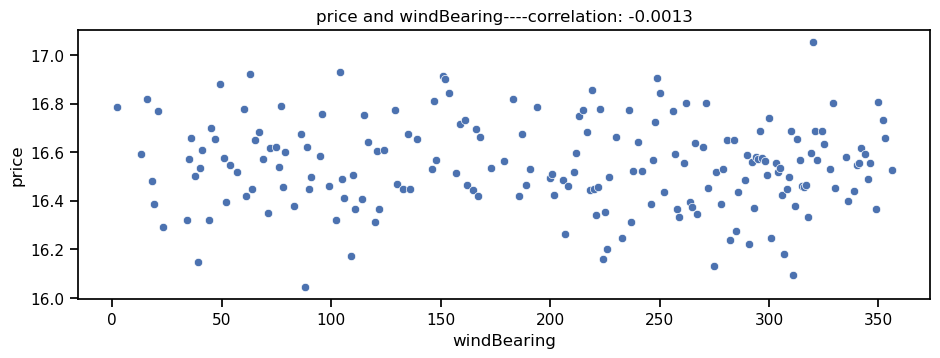

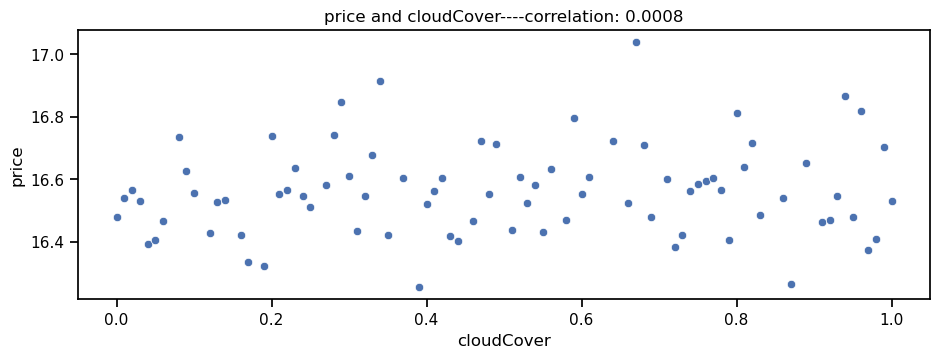

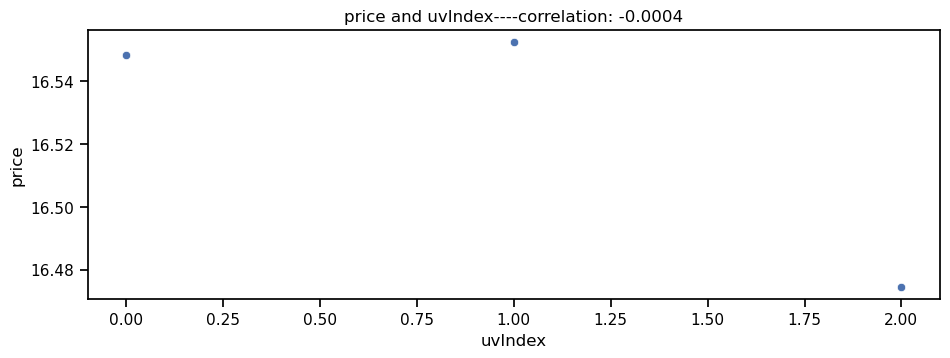

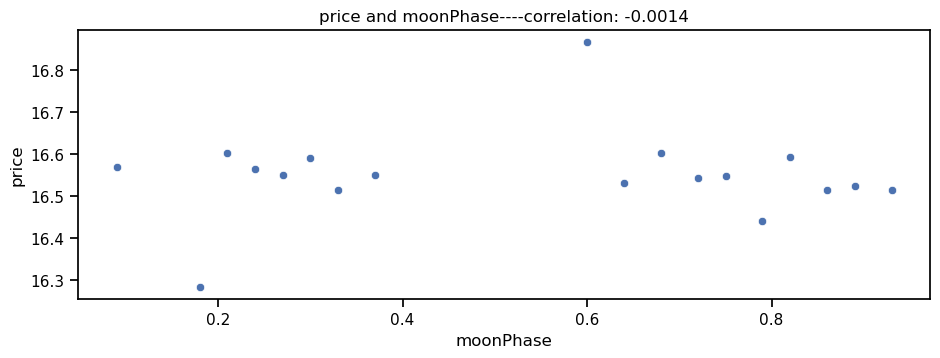

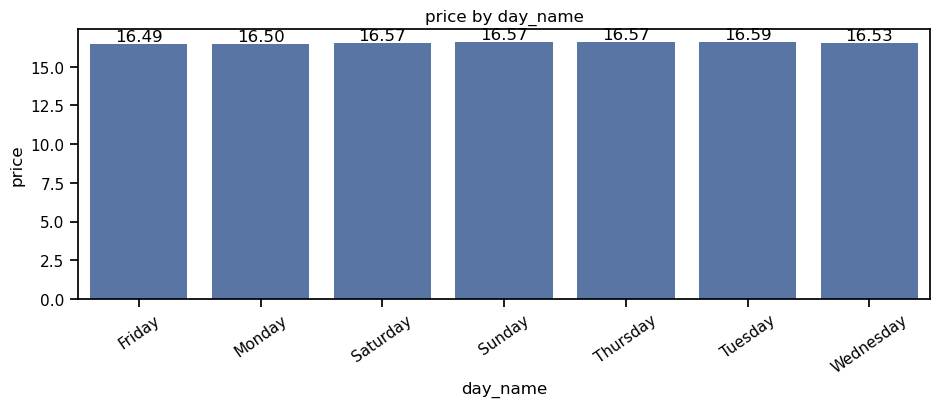

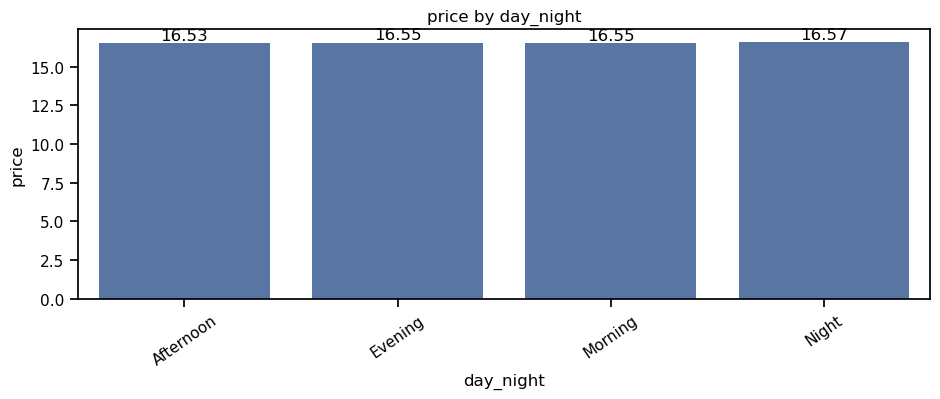

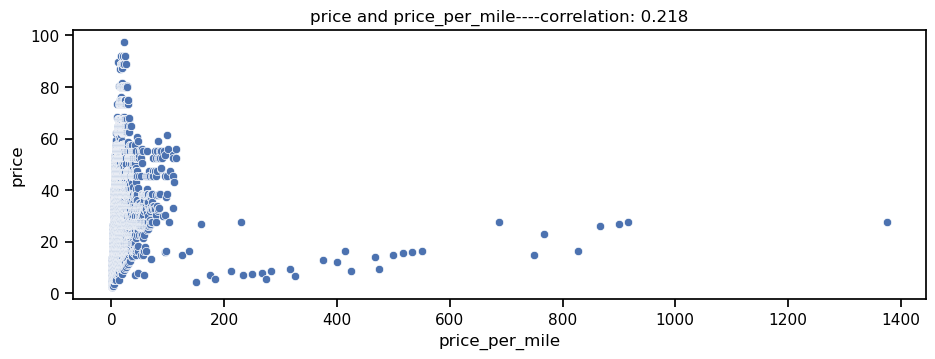

In [357]:
correlation(df,'price')

***Top Influential variables on Price***
1. Name (service type): very strong impact:
Premium service like Lux Black XL, Black SUV, and Lux Black are 3-5 times more expensive than budget options like Shared or UberPool..
2. cab_type(Uber and Lyft) - Moderate impact
Uber and Lyft show some pricing differences, but are not decisive compared to service type
3. Source and destination (location)- mild impact  
Higher prices: Boston University, Fenway, Northeastern University tend to be:  
densely populated and high demand zones,popular pickup or drop off point,especially university, Fenway stadium, so increase demand.  
Lower prices: Haymarket Square, South Station tend to be: well connected to public transport, which may reduce hailing ride demand.  
Have shorter average ride distance to nearby central area.  
Be located in zones with lower congestion, leading to faster and cheaper trips.  
4. Distance: has positive correlation with price


***Weather & Time-Related Variables*** 
 
Weak or Negligible Correlation => This suggests weather conditions have almost no effect on ride price  

***Time Features*** – Almost No Impact

***Location Coordinates*** – No Impact



### Analysis by car ###

In [358]:
def overall(df, *cols):
    """
    Aggregate ride-sharing metrics by specified columns.
    Returns total rides, revenue (in millions), and distance and price per mile.
    """
    result= df.groupby(list(cols)).agg(total_ride=('price','size'),
                            total_revenue=('price','sum'),
                            mean_distance=('distance','mean'),
                            mean_per_mile=('price_per_mile','mean')).reset_index().sort_values(by='total_ride',ascending=False)
    result['total_revenue']=round(result['total_revenue']/1000000,2).astype(str)+" M"
    return result

In [359]:
name_chart=overall(df,*['cab_type','name'])
name_chart

,cab_type,name,total_ride,total_revenue,mean_distance,mean_per_mile
11,Uber,UberXL,55005,0.86 M,2.191635,9.131019
7,Uber,Black SUV,54982,1.67 M,2.192560,19.413953
9,Uber,UberPool,54980,0.48 M,2.191963,5.335719
6,Uber,Black,54971,1.13 M,2.192273,12.367303
12,Uber,WAV,54955,0.54 M,2.191760,5.941684
10,Uber,UberX,54952,0.54 M,2.192101,5.940826
8,Uber,Taxi,54542,0.9 M,2.192664,11.320458
2,Lyft,Lux Black XL,51209,1.66 M,2.187042,18.764670
5,Lyft,Shared,51205,0.31 M,2.187219,3.300656
0,Lyft,Lux,51204,0.91 M,2.187203,9.596203


Conclusion:  
-UberXL has highest ride (55005 rides), line Uber has number ride around 54000,while Lyft lines hover around 51100 rides.  
=> Uber has larger market share.    
-Lyft has higher surge ration, this help increase revenue in high peak.  
-The line premium of both line Uber and Lyft (Lux, Lux Black, Black SUV,Lyft Lux Black XL, Lyft Lux Black...) has good revenue, high prices and generate more profit per miles  
-Sharing service like UberPool and Lyft Share are low cost and suitable for budget users  


### Analysis by weather condition ###

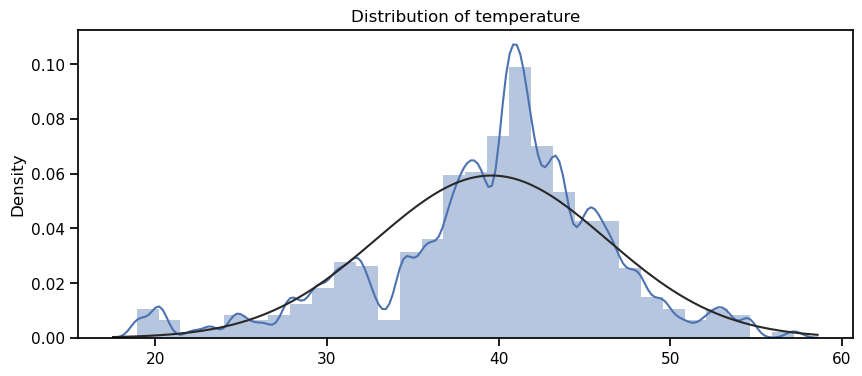

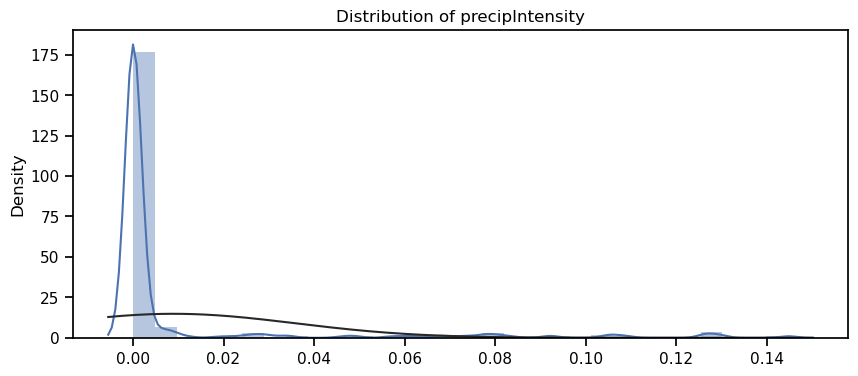

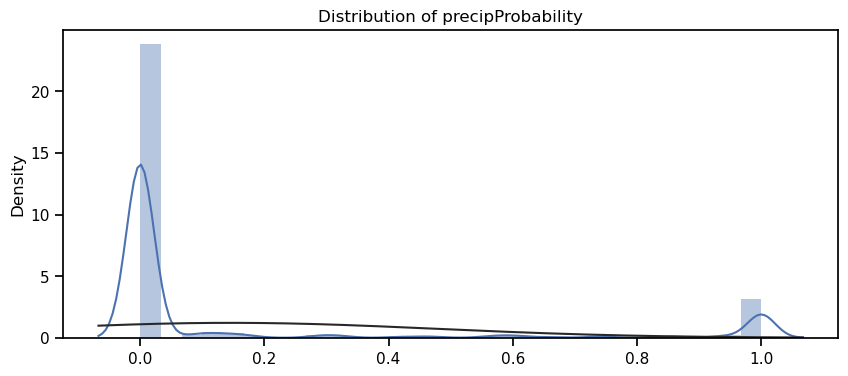

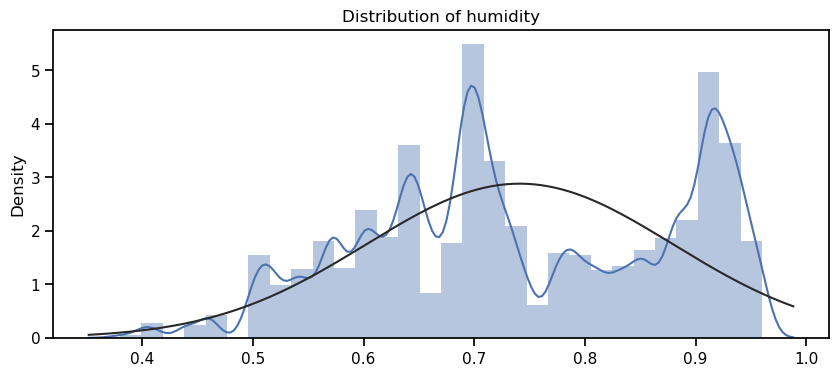

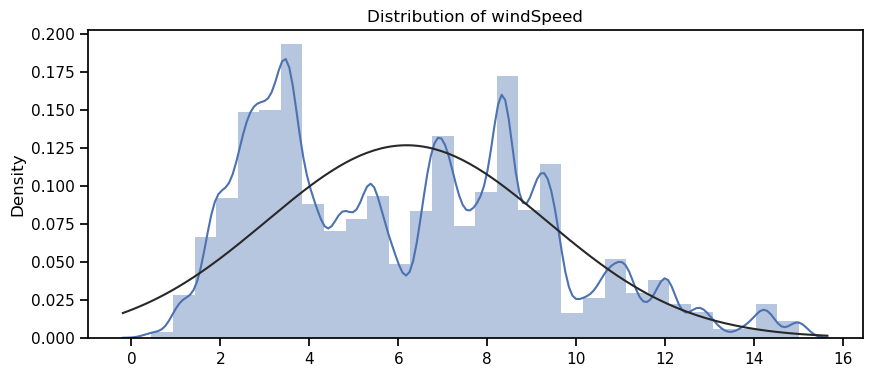

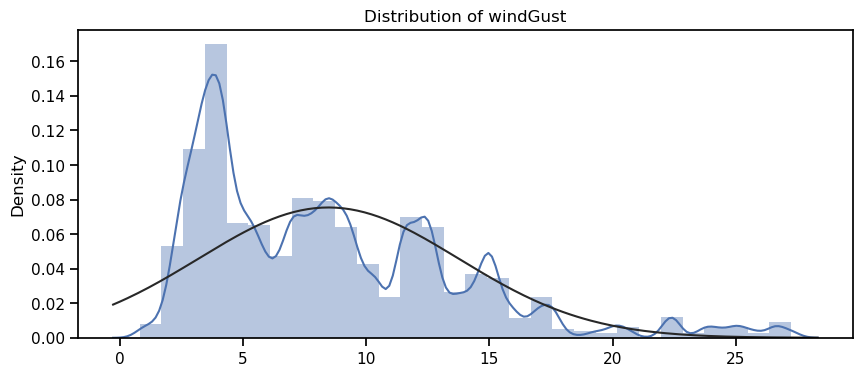

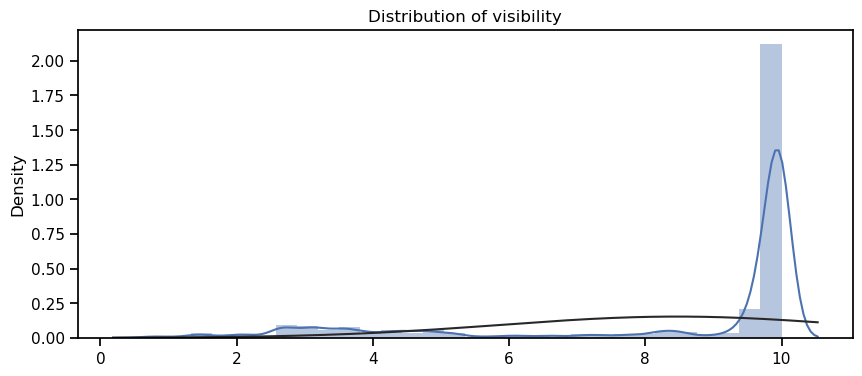

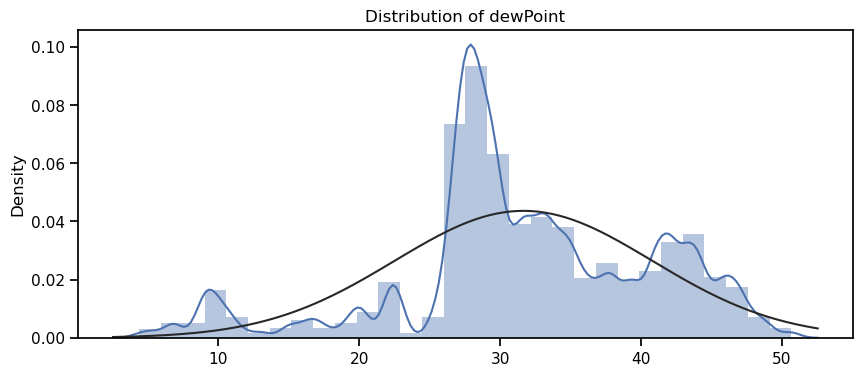

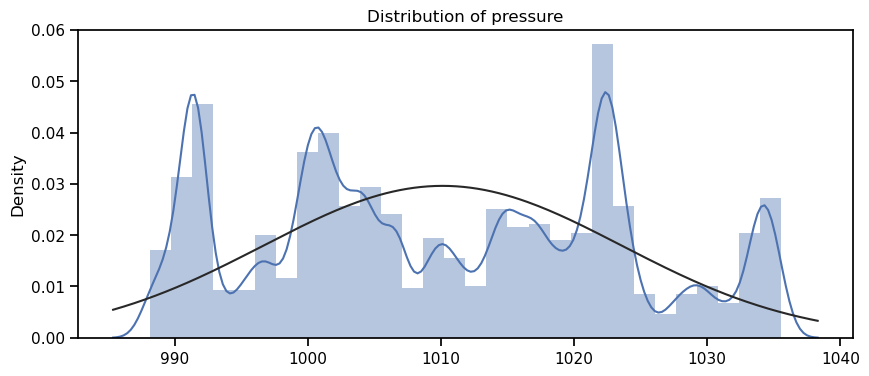

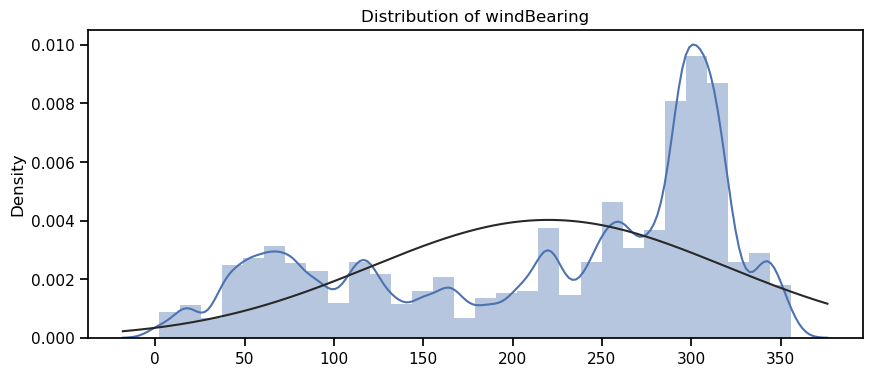

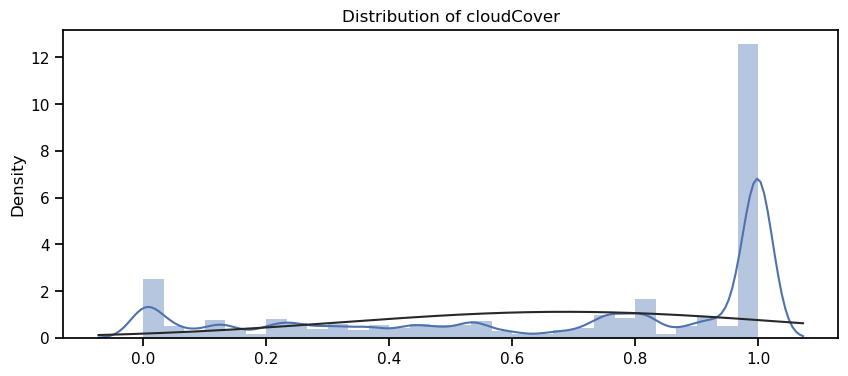

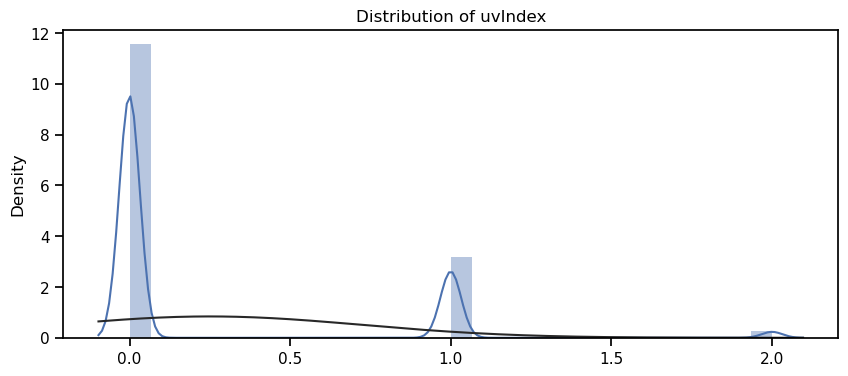

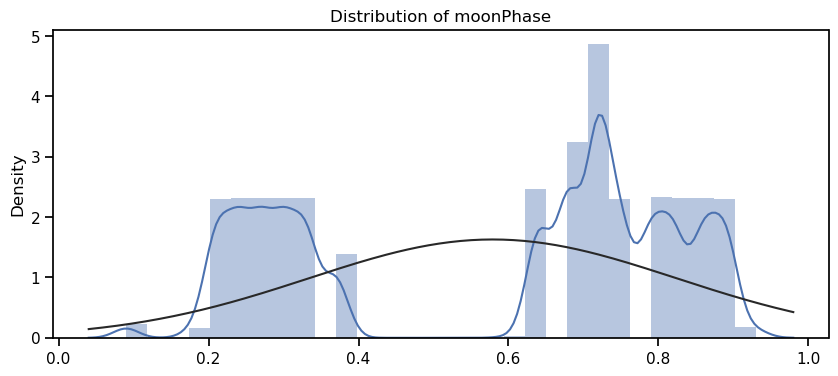

In [360]:
from scipy.stats import norm

weather_features=['temperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'moonPhase',]

for k in weather_features:
    plt.figure(figsize=(10,4))
    sns.distplot(x=df[k],bins=30,fit=norm)
    plt.title(f'Distribution of {k}')

***Summary of 13 weather distributions***
1. Temperature:  
Nearly normal distribution, peak around 40 degree=> higher temperature, passengers avoid heat, more ride use
2. PrecipIntensity and precipProbability =>light rain has minimal effect, high rain has demand spikes, rides book more during definite rain (1.0)  
3. Humidity=> around 0.7 and 0.9 => common humidity conditions=> uncomfort=> more ride hailing usage.  
4. Windspeed: multi modal , not strongly predictive.  
5. Windgust: Right-skewed, common around 3–6 m/s, some strong outliers,Gusty winds discourage walking/biking =>more ride bookings
6. Visibility: Strongly skewed toward 10 (weather clear),but some records with low visibility=> (fog, heavy rain)=> likely ride demand spike
7. Dewpoint: slightly skewed, major peak around 27-32=> hot and humid, passenger prefer booking ride to walking
8. Pressure: Multiple peaks from 985–1035 hPa, non-normal	Low pressure may imply bad weather → indirect influence
9. WindBearing: cluster near 300, uneven distribution. No clear effect.
10. Cloudcover: Strongly right skewed, mostly near 1=> cloudy weather, higher ride demand
11. UvIndex: Highly concentrate 0 and 1, mostly recorded during cloudy or nighttime hours (0), or Uv_index reach high peak (1 or 2), demand spike due to hot weather
12. MoonPhase: peaks around ~0.25 and ~0.75 (crescent phases), sparse at full/new moon	Possible behavioral shift on full moon nights (less booking?) or lunar calendar effects

Text(0.5, 1.0, 'Temperature of period day by Temperature when surger_multiplier >1')

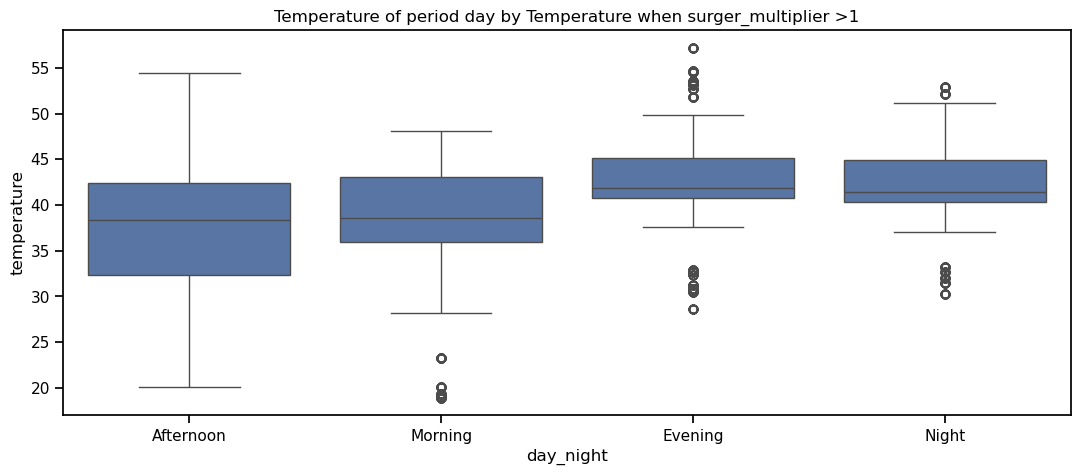

In [361]:
df_surge = df[df['surge_multiplier'] > 1]
plt.figure(figsize=(13,5))
sns.boxplot(data=df_surge,x='day_night',y='temperature')
plt.title('Temperature of period day by Temperature when surger_multiplier >1')

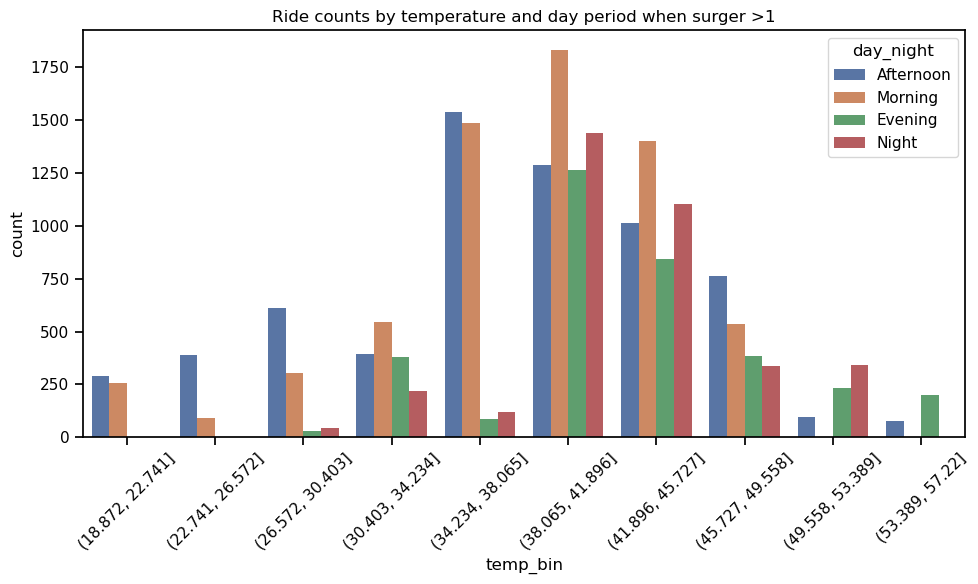

In [362]:
df_surge = df[df['surge_multiplier'] > 1]
plt.figure(figsize=(10,6))
df_surge['temp_bin']=pd.cut(df_surge['temperature'],bins=10)
sns.countplot(data=df_surge,x='temp_bin',hue='day_night')
plt.xticks(rotation=45)
plt.title('Ride counts by temperature and day period when surger >1')
plt.tight_layout()

***Impact of temperature and period of day on surge pricing***
1. Most frequent surge rides happen at mild temperature at [34F-45F]=> This suggests that demand for rides increase when the weather is neither too hot or too cold. Poeple tend to go out or move more in moderate temperature
2. Evening & Night have higher median temperatures when surger occurs
This may reflect that in the evening=> people get off work, go out, eat or entertain=> demand for rides increase, espcially when the weather is still warm => suger pricing is more likely to be triggered
3. Afternoon has the most temperature fluctuations:
Afternoon slots have both high and low temperatures → although varied, they do not always generate surges, so they are not the main factor.



***Threhold for Probability***  

Most of the data is concentrated near 0 → many cases of no rain.  
A small cluster near 1 → rain is very certain.  
From about 0.1 to 0.3 is an ambiguous area, but there are a few scattered points.   
=>Choosing threshold = 0.2 helps to separate the two areas:  
Probability < 0.2 → almost no rain.  
Probability ≥ 0.2 → higher chance of rain, accepting some uncertainty but safe to warn.  

In [363]:
df['will_rain']=df['precipProbability'].apply(lambda x : "Yes" if x >0.2 else "No")

In [364]:
overall(df,'will_rain').head(10)

,will_rain,total_ride,total_revenue,mean_distance,mean_per_mile
0,No,576919,9.55 M,2.190003,9.796859
1,Yes,114659,1.9 M,2.189627,9.905090


### Analysis overtime ###

In [365]:
metric_by_hour=overall(df,'hour')
metric_by_hour.sort_values(by='hour')

,hour,total_ride,total_revenue,mean_distance,mean_per_mile
0,0,32312,0.54 M,2.185844,9.870287
1,1,28480,0.47 M,2.182762,9.810886
2,2,28486,0.47 M,2.195619,9.778520
3,3,27762,0.46 M,2.186341,9.768455
4,4,28272,0.47 M,2.179011,9.755876
5,5,24967,0.41 M,2.179903,10.034114
6,6,27271,0.45 M,2.192159,9.975559
7,7,24887,0.41 M,2.177415,9.633230
8,8,24234,0.4 M,2.198503,9.809435
9,9,28903,0.48 M,2.191845,9.644706


In [366]:
overall(df,'day_night')

,day_night,total_ride,total_revenue,mean_distance,mean_per_mile
2,Morning,214359,3.55 M,2.186461,9.819994
0,Afternoon,210817,3.48 M,2.191255,9.785347
1,Evening,118493,1.96 M,2.194234,9.877009
3,Night,115597,1.92 M,2.190743,9.779621


In [367]:
overall(df,'day')

,day,total_ride,total_revenue,mean_distance,mean_per_mile
13,27,75853,1.26 M,2.189725,9.947151
14,28,73398,1.21 M,2.186909,9.800179
15,29,59815,0.99 M,2.191654,9.780386
0,1,45181,0.75 M,2.183180,9.768498
16,30,45012,0.74 M,2.174858,9.881160
7,14,44881,0.74 M,2.200788,9.650030
8,15,44872,0.74 M,2.180340,9.908956
10,17,44870,0.74 M,2.189270,9.760110
9,16,44859,0.74 M,2.204223,9.663751
1,2,44857,0.74 M,2.200703,9.897876


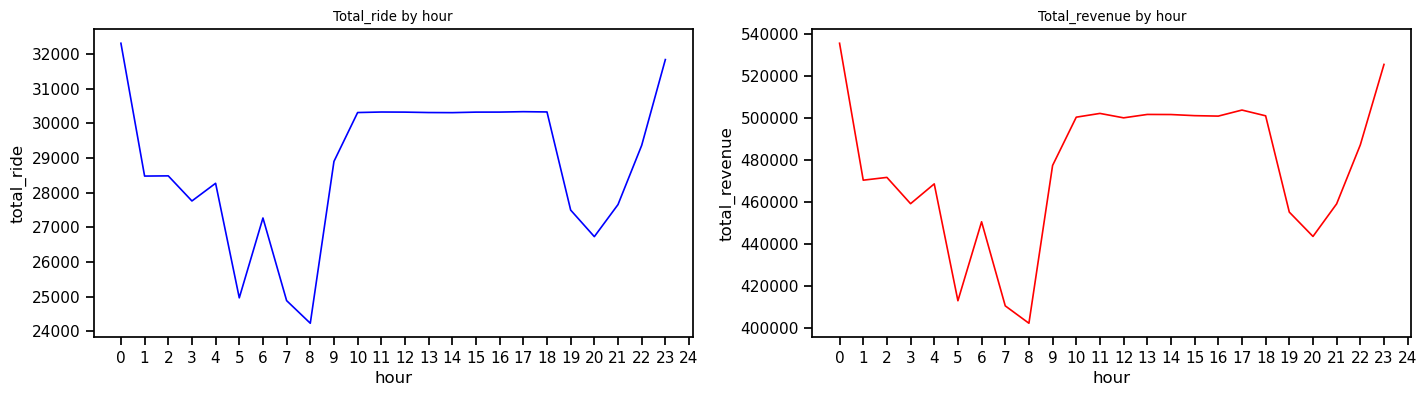

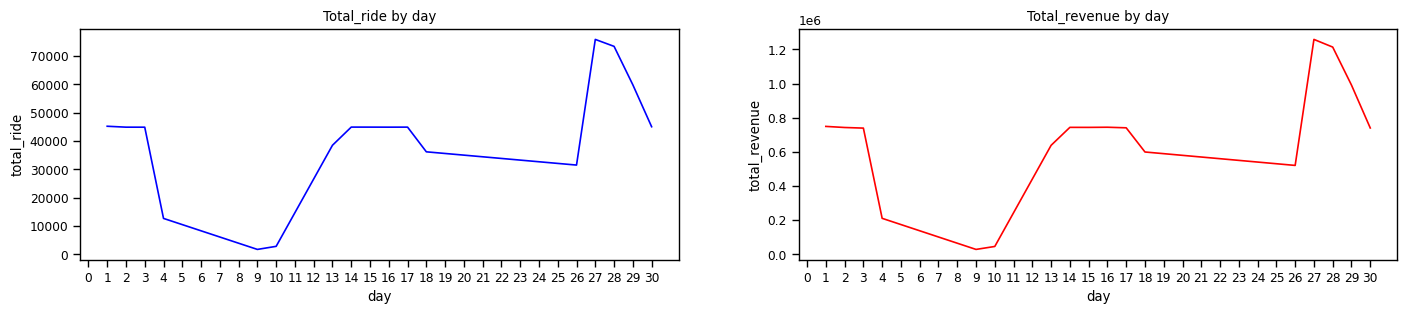

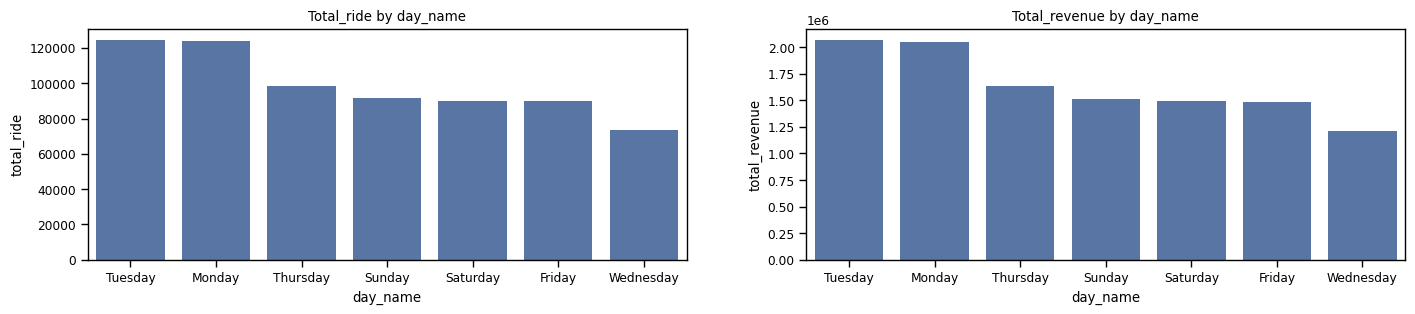

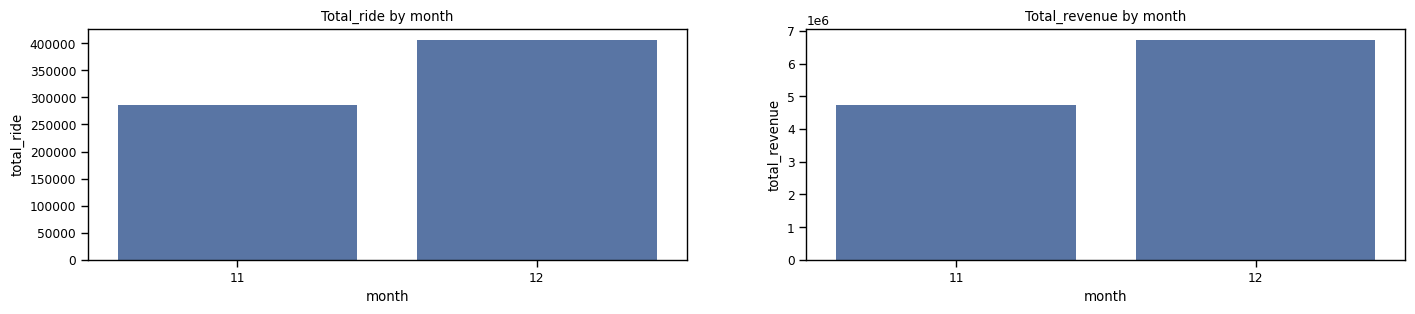

In [368]:
cols= ["hour","day", "day_name","day_night","month"]
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i in cols:
    temp=df.groupby(i).agg(total_ride=('price','size'),
                            total_revenue=('price','sum')).reset_index().sort_values(by='total_ride',ascending=False)
    if i =='day':
        fig,ax=plt.subplots(1,2,figsize=(17,3))
        sns.set_context('paper')
        sns.lineplot(x=i,y='total_ride',data=temp,color='blue',ax=ax[0]) 
        sns.lineplot(x=i,y='total_revenue',data=temp,color='red',ax=ax[1])
        ax[0].set_title(f'Total_ride by {i}')
        ax[1].set_title(f'Total_revenue by {i}')
        ax[0].set_xticks(range(0, 31))  
        ax[1].set_xticks(range(0, 31))
        plt.tight_layout
    if i =='hour':
        fig,ax1=plt.subplots(1,2,figsize=(17,4))
        sns.set_context('paper')
        sns.lineplot(x=i,y='total_ride',data=temp,color='blue',ax=ax1[0])
        sns.lineplot(x=i,y='total_revenue',data=temp,color='red',ax=ax1[1])
        ax1[0].set_title(f'Total_ride by {i}')
        ax1[1].set_title(f'Total_revenue by {i}')
        ax1[0].set_xticks(range(0,25))  
        ax1[1].set_xticks(range(0,25))
        plt.tight_layout
    if i in ['day_name','month']:
        fig,ax2=plt.subplots(1,2,figsize=(17,3))
        sns.barplot(x=i,y='total_ride',data=temp,color=sns.set_palette('deep'),ax=ax2[0])
        sns.barplot(x=i,y='total_revenue',data=temp,color=sns.set_palette('deep'),ax=ax2[1])
        ax2[0].set_title(f'Total_ride by {i}')
        ax2[1].set_title(f'Total_revenue by {i}')
   

***Conclusion***  
***Demand  by hour***:  
--Peak hour:  
0h(midnight) and 23:00 have the highest number of bookings, over 30K => many people go out for parties,get of work late,safety,...  
From 9:00 to 18:00: the number of bookings is stable at high level,fluctuating around 30K=> office hour,users book car to go to work,meet partners,personal work.   
--Off Peak hour:   
19h-21h: slightly reduce, rest time at home   
3h-5h: very low, maybe sleep time    
6h-8h: Maybe users are switching to other means of transport (motorbikes, buses to work), or Uber data is low at the moment.   
***Demand by day***:    
Rides demand by time is high at the beginning of the week(Mondays,Tuesdays), possibly due to works, meeting, business trips, daily activies   
Rides demand decreases on weekends, posssibly due to holidays.  
***Demand by month***:   
December has a much higher number of bookings than November=> the reason why, December fall on holidays,year-end-shopping,parties so on the demand can increases.    



#### ***Analyze and visualize the impact of temporal factors on the number of rides and the surge mulyiplier, considering only rides with a surge multiplier greater than 1***


In [369]:
chart1 = df_surge.groupby(['day','month']).size().reset_index(name='total_rides').sort_values(by='total_rides', ascending=False)
chart1

,day,month,total_rides
13,27,11,2340
14,28,11,2270
15,29,11,1844
0,1,12,1412
10,17,12,1405
9,16,12,1403
2,3,12,1349
16,30,11,1329
7,14,12,1326
8,15,12,1321


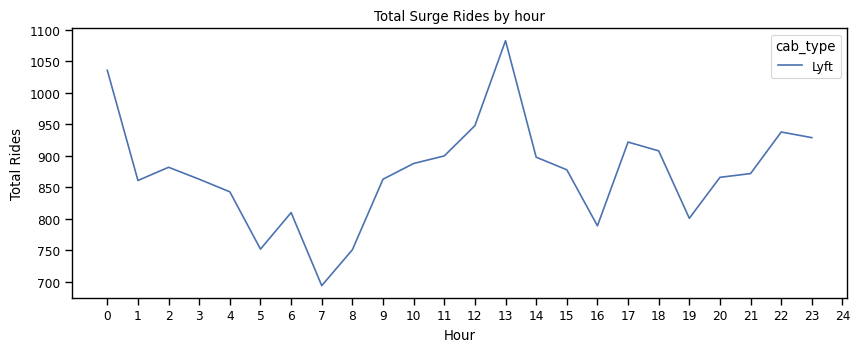

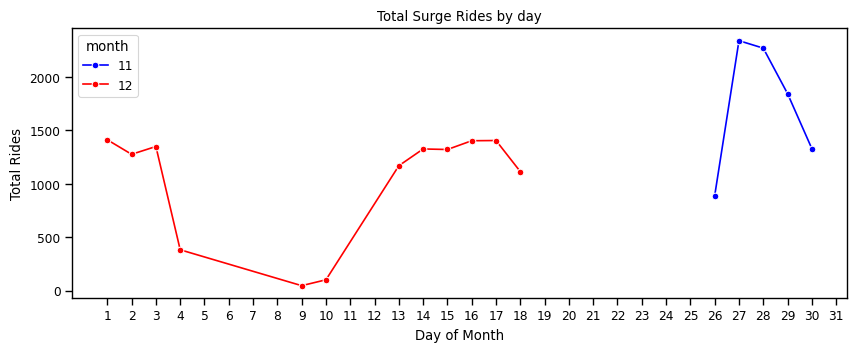

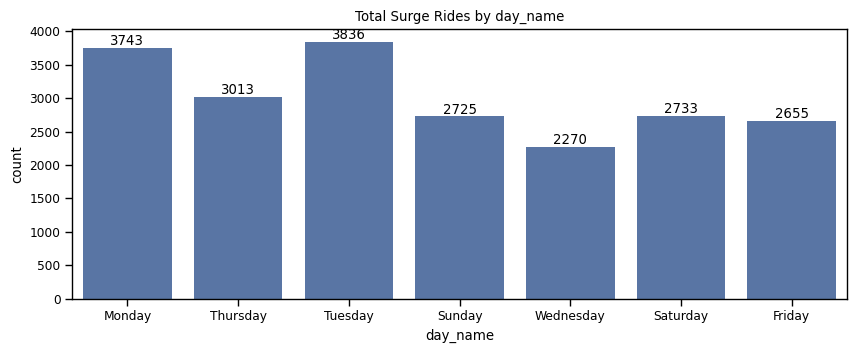

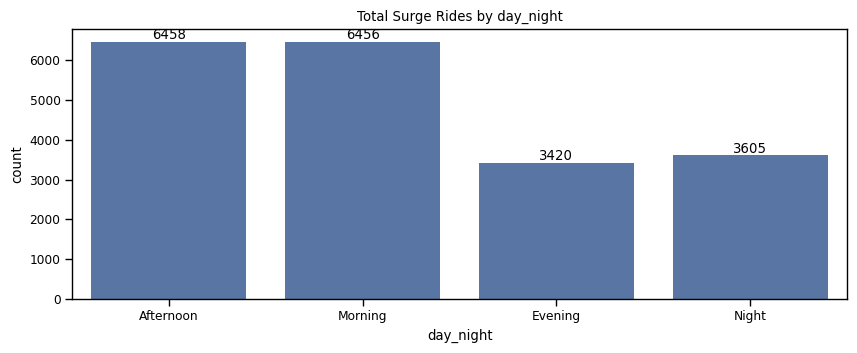

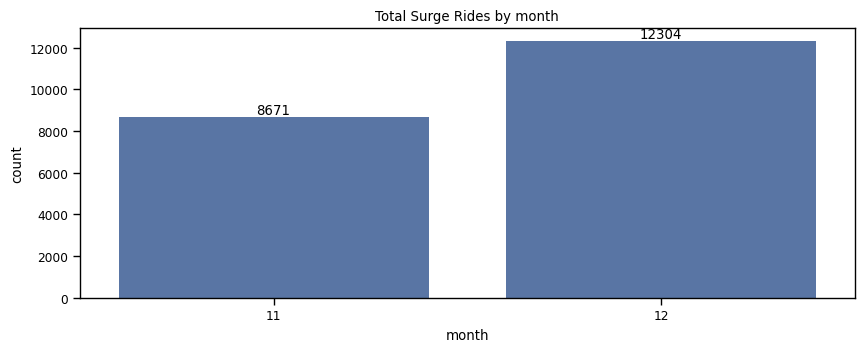

In [370]:
cols = ["hour", "day", "day_name", "day_night", "month"]
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for i in cols:
    if i =='hour' :
        chart = df_surge.groupby(['hour','cab_type']).size().reset_index(name='total_rides').sort_values(by='total_rides', ascending=False)
        plt.figure(figsize=(10,3.5))
        sns.lineplot(data=chart, x=i, y='total_rides',hue='cab_type',color='red')
        plt.title(f'Total Surge Rides by {i}')
        plt.xticks(range(0,25))
        plt.xlabel('Hour')
        plt.ylabel('Total Rides')
        plt.show()
    elif i == 'day':
        chart1 = df_surge.groupby(['day', 'month']).size().reset_index(name='total_rides').sort_values(by=['month', 'day'])
        plt.figure(figsize=(10,3.5))
        sns.lineplot(data=chart1, x='day', y='total_rides', hue='month',palette=['blue','red'],marker='o') 
        plt.title(f'Total Surge Rides by {i}')
        plt.ylabel('Total Rides')
        plt.xlabel('Day of Month')
        plt.xticks(range(1, 32))
    if i in ["day_name", "day_night", "month"]:
        plt.figure(figsize=(10,3.5))
        ax=sns.countplot(x=i,data=df_surge)
        for k in ax.containers:
            plt.bar_label(k)
        plt.title(f'Total Surge Rides by {i}')

Surge demand peaks in December, especially mid-month, reflecting the holiday season.

The highest surge periods occur in the morning and afternoon, aligning with typical commuting hours.

Early weekdays (especially Monday and Tuesday) show higher surge activity, indicating a fast-paced start to the workweek.

Unusual hours with high surge (such as midnight and 1:PM) may be linked to special activities like parties or events.

**Analysis Location**

In [371]:
metric_by_source=overall(df,'source')
metric_by_source.sort_values(by='total_ride',ascending=False)

,source,total_ride,total_revenue,mean_distance,mean_per_mile
4,Financial District,58712,1.06 M,2.717013,11.800419
0,Back Bay,57705,0.93 M,1.996518,9.907792
9,South Station,57693,0.91 M,1.846509,11.056495
6,North End,57661,0.88 M,1.608226,10.419997
8,Northeastern University,57656,1.03 M,2.729363,6.979761
10,Theatre District,57644,0.96 M,2.009928,10.785198
3,Fenway,57643,1.05 M,2.811179,6.846017
2,Boston University,57636,1.08 M,3.050815,7.309451
5,Haymarket Square,57594,0.8 M,1.118041,15.187496
11,West End,57397,0.93 M,2.130987,9.613590


In [372]:
metric_by_destination=overall(df,'destination')
metric_by_destination.sort_values(by='total_ride',ascending=False)

,destination,total_ride,total_revenue,mean_distance,mean_per_mile
4,Financial District,58769,1.05 M,2.589866,10.712614
10,Theatre District,57681,0.92 M,1.923262,9.509242
0,Back Bay,57676,0.94 M,2.086792,9.024033
8,Northeastern University,57674,1.02 M,2.642467,7.561645
6,North End,57643,0.87 M,1.639681,10.253676
5,Haymarket Square,57610,0.83 M,1.330970,12.982467
2,Boston University,57606,1.08 M,3.013090,7.647087
3,Fenway,57581,1.04 M,2.860708,6.766015
9,South Station,57581,0.86 M,1.627704,14.774849
11,West End,57487,0.93 M,2.116154,9.905610


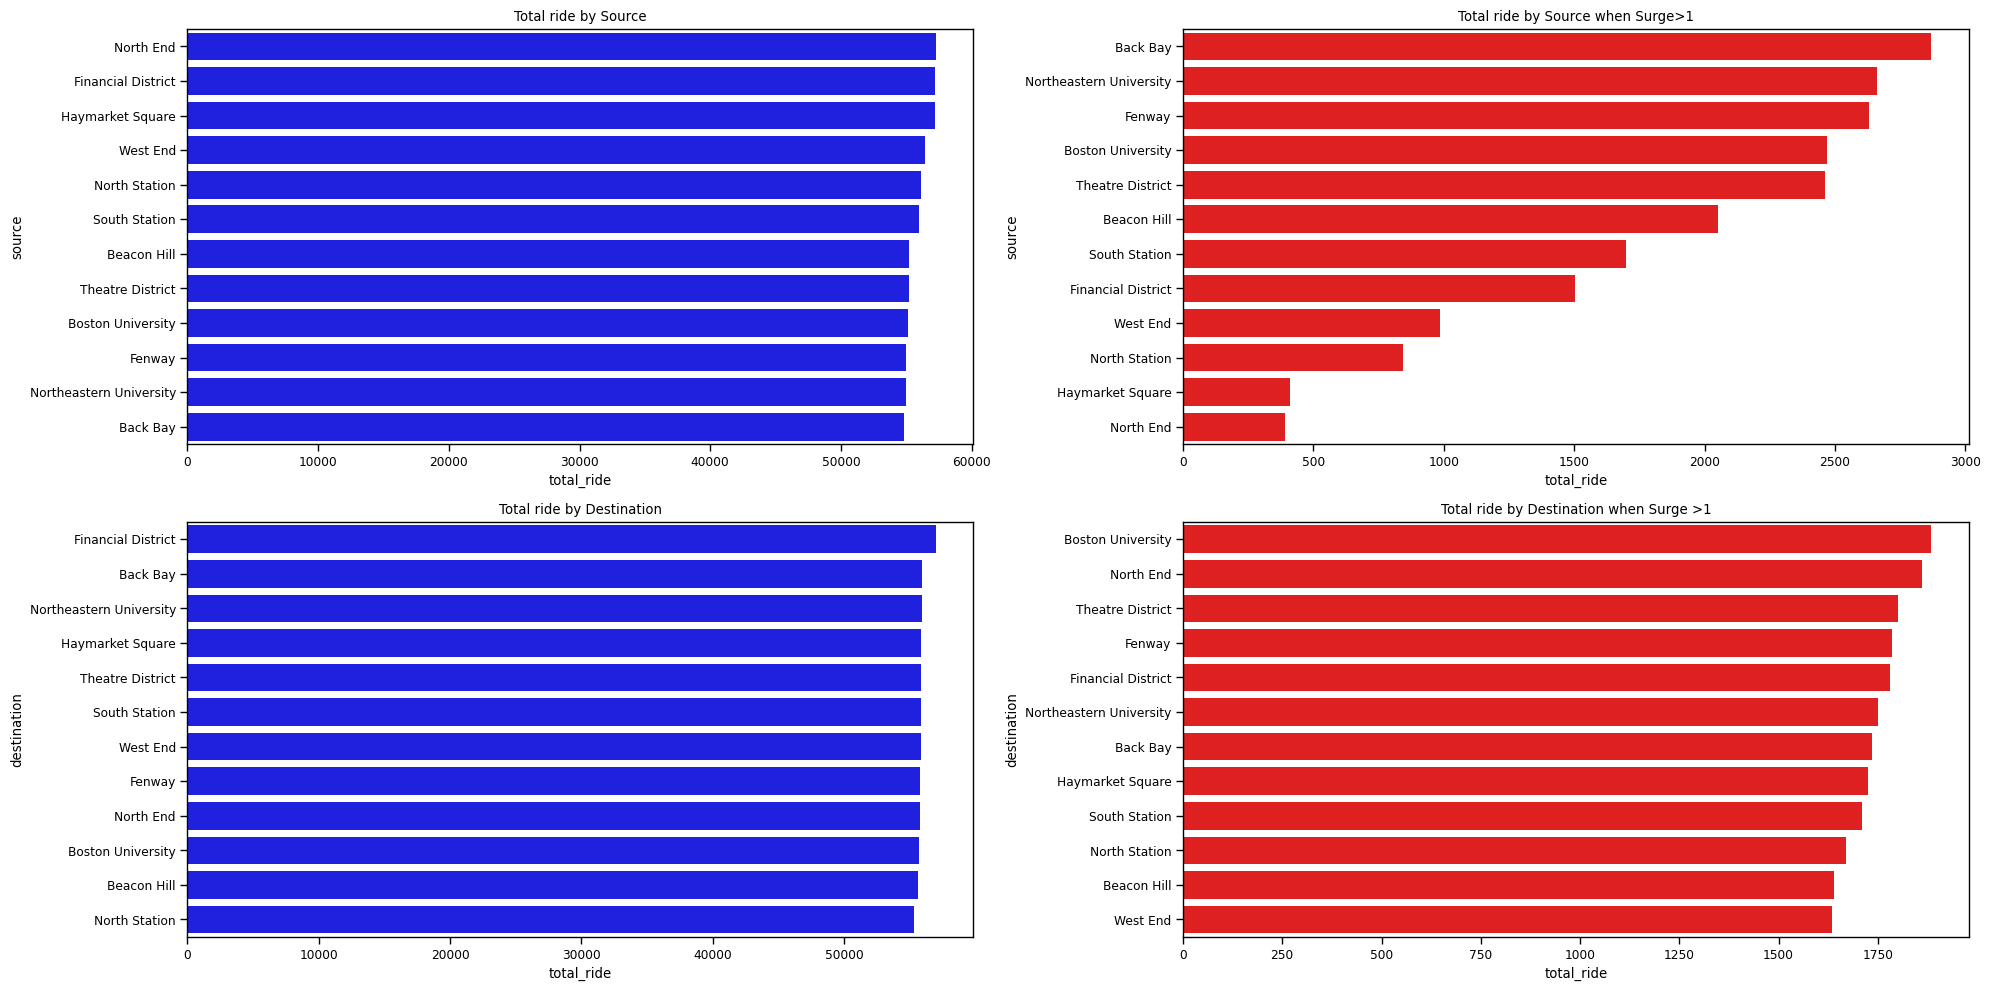

In [373]:
df_normal=df[df['surge_multiplier']==1]
pick_point=overall(df_normal,'source')
pick_point_surge=overall(df_surge,'source')
drop_point=overall(df_normal,'destination')
drop_point_surge=overall(df_surge,'destination')
fig, ax = plt.subplots(2,2, figsize=(20, 10)) 
sns.barplot(y='source',x='total_ride',data=pick_point,color='blue',ax=ax[0][0])
sns.barplot(y='source',x='total_ride',data=pick_point_surge,color='red',ax=ax[0][1])
sns.barplot(y='destination',x='total_ride',data=drop_point,color='blue',ax=ax[1][0])
sns.barplot(y='destination',x='total_ride',data=drop_point_surge,color='red',ax=ax[1][1])
ax[0][0].set_title('Total ride by Source')
ax[0][1].set_title('Total ride by Source when Surge>1')
ax[1][0].set_title('Total ride by Destination')
ax[1][1].set_title('Total ride by Destination when Surge >1')
plt.tight_layout()

1. Predict surge-price prone areas to optimize driver allocation  
The data reveals high surge areas such as Back Bay, Northeastern University, and Fenway, where demand often exceeds supply. Identifying these hotpots enables the company proactively dispatch more drives, reducing customer wait time and impoving service efficency.
The Financial District (the business hub of Boston) received slightly more traffic than the rest – confirming the afternoon business meetings on Mondays and Tuesdays.
2. Developing flexible pricing strategies based on location  
Some areas like Boston University show frequent surge price pricing despite a lower number of rides,indicating sensitive supply demand dynamics.
This shows that small changes in demand or supply can quickly effect pricing. 
Understanding this helps apply flexible pricing strategies that adjust to each area and time, hour, increasing profit and improving customer experience.
3. ***Solution: the company can incentivize more drivers to operate in those zones or launch recruitment campaigns in underserved areas.***



In [374]:
pd.set_option('display.max_rows', 72)
sou_des_overall=df.groupby(by=["source","destination"]).agg(total_ride=('price','size'),
                            mean_price=('price','mean'),
                            revenue=('price','sum'),
                            distance=('distance','mean'),
                            mean_price_per_mile=('price_per_mile','mean')).sort_values(by=['total_ride'],ascending=False).reset_index()
sou_des_overall

,source,destination,total_ride,mean_price,revenue,distance,mean_price_per_mile
0,South Station,Financial District,10336,12.760867,131896.322400,0.601137,21.396729
1,Financial District,South Station,10298,12.681422,130593.280894,0.418312,30.577582
2,Back Bay,North End,10221,19.238000,196631.596773,2.869198,6.882251
3,North End,Back Bay,10220,19.309452,197342.596773,2.815838,6.947521
4,Fenway,West End,10146,18.035519,182988.374765,2.791994,6.460769
5,West End,Fenway,10129,17.829505,180595.058887,2.897677,6.149665
6,Haymarket Square,Financial District,10109,13.028774,131707.874765,0.971326,13.508422
7,Financial District,Haymarket Square,10107,13.454990,135989.584514,1.157793,11.761275
8,Beacon Hill,North End,10029,15.371166,154157.419891,1.790440,8.861230
9,North End,Beacon Hill,10027,16.026561,160698.329640,1.894004,8.700356


Text(0.5, 1.0, 'Price from Source to Destination')

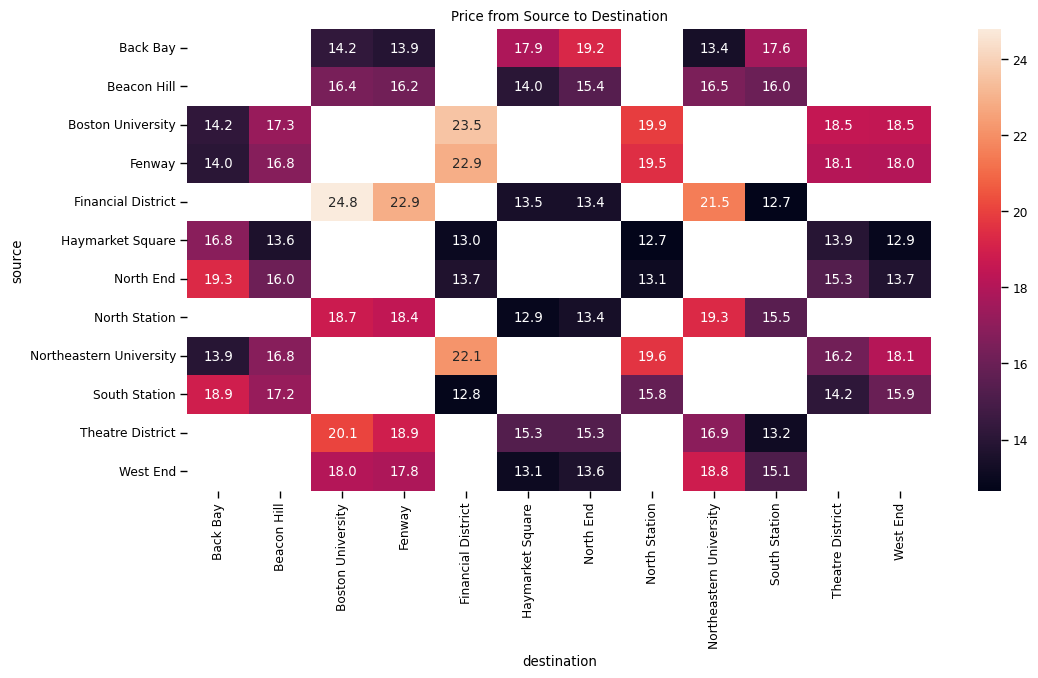

In [375]:
plt.figure(figsize=(12,6))
price_pv_table_source_destination=pd.pivot_table(
                                data=sou_des_overall,columns='destination',index='source',values='mean_price'
)
sns.heatmap(price_pv_table_source_destination,fmt='.1f',annot=True)
plt.title('Price from Source to Destination')


<Axes: xlabel='total_ride', ylabel='source_destination'>

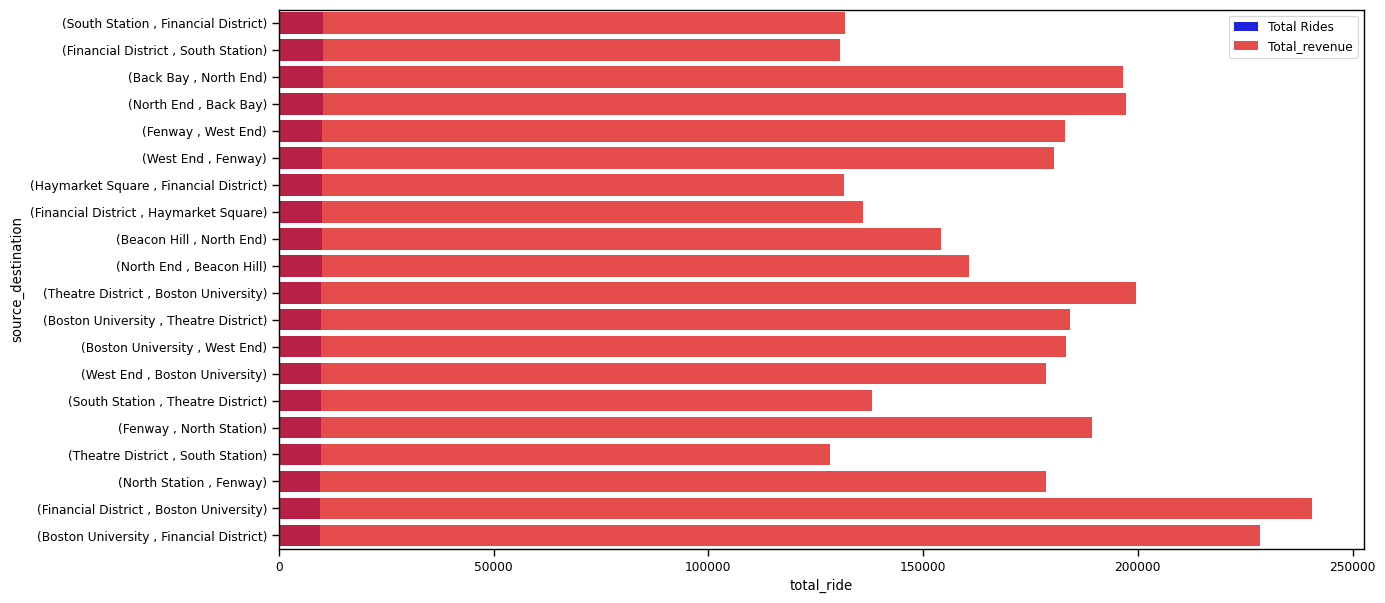

In [376]:
sou_des_overall['source_destination']="("+ sou_des_overall['source']+' , '+sou_des_overall['destination']+")"
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(data=sou_des_overall[:20],x='total_ride', y='source_destination', ax=ax, color='blue', label='Total Rides')
sns.barplot(data=sou_des_overall[:20],x='revenue',y='source_destination',ax=ax,color='red',label='Total_revenue',alpha=0.8)

***Based on 2 chart above:***
1. Price not a key factor effect of ride volumes-geographic and functional factors play a key role.  
=> Hypothesis: Location such as South Station, Fenway, and Boston University may serve as a major transit hubs, tourist attractions, or educational institutions, leading to high ride volumes, despite above-average price.  
2. Routes with high demand are often low priced=> competitive or good price incentives.  
Asssumption: Routes with high total_ride but low prices may be popular routes, so companies have low cost to maintain market share, or customers use ride sharing (UberPool/Lyft Shared) more.  
3. Influence of time of day:  
Assumption: Routes with high trip may also be located on the rush hour commute/ school axis.  
5. Some routes have high prices due to traffic conditions (traffic jams, or difficult to acess this area).  
Assumptions:higher average price on some routes may not only be due to distance, but also due to surge pricing, congested traffic conditions.
 


In [377]:
##we can see our maximum price data
df.price.max()

np.float64(97.5)

In [378]:
##See details about maximum price data
df[df['price']==df.price.max()][['source','destination','name','latitude','longitude','price']]

,source,destination,name,latitude,longitude,price
597071,Financial District,Fenway,Lux Black XL,42.3503,-71.081,97.5


Interestingly, the route from Financial to Fenway (via Lux Black Xl) recored a cost of $97.5. -the hightest price in our dataset.  
However based on heat map chart of price between source and destination, the average price for trips from Financial District to Fenway is only $22.9.  
This raises the possibility that value is an outlier value, especialy given the lack of information about trip information, trip duration. Futher investigation of other trips on the same route  is needed to validate this observation.  
The mean of the price data of that route is 23.4 dollars, which is far from our maximum price data (97.5 dollars). Then it is possible an outlier. We can drop it.

In [379]:
df = df.loc[df['price']!=df.price.max()]

1. Pickup and Dropoff Location  
Financial District, Back Bay1. Customers travel a lot at major locations:  
Financial District, Back Bay, South Station, North End, Boston University, Theater District are popular pick-up and drop-off locations with total trips above 57,000, indicating that these are central or key transportation areas.   

2. Average revenue and price:  
The highest revenue and average price per trip are at Boston University, Fenway, Financial District, with an average price of ~18 USD per trip. This may be due to longer travel distances or higher fares due to the characteristics of the area.   

    =>Locations such as Haymarket Square, North End, South Station have lower average prices (~14-16 USD), possibly due to shorter average distances or price competition.  

3. Average distance:  
Areas such as Boston University, Fenway, Northeastern University have longer average trip distances (~2.6 - 3.0 km), corresponding to higher prices.  

    Central locations such as Haymarket Square and South Station have shorter distances (~1.1 - 1.6 km).  

4. Average price per mile:  
Some locations such as Haymarket Square (15.18 source, 12.98 destination), South Station (11.06 source, 14.77 destination) have very high prices per mile, indicating relatively expensive fares in short-distance areas.  

    College areas such as Boston University, Fenway, and Northeastern University have lower prices per mile (~6.7 - 7.6 USD), due to longer distances and possible different pricing policies.  

5. Surge Multiplier:  
The surge multiplier is relatively stable, ranging from 1.002 to 1.026, with the highest being Back Bay (1.026 source), indicating high demand or surge periods are common in this area.  

    Other points have a price increase factor around 1.01 - 1.02, meaning prices increase slightly when demand is high., South Station, North End, Boston University, Theatre District,Haymarket Square,Beacon Hill  


# 3. Predictive Analysis for Uber Price Prediction using Machine Learning

Finally, let’s use machine learning models from scikit-learn to train on the Uber dataset and predict the price of the Uber trip given features such as time of day, cab type, destination, source, and surge charges. We will also include some weather data in the feature list.

### 1.Removing Unnecessary Features

Our goal is to make linear regression model. First we check correlation between our features and target feature (price)

In [380]:
new_df = df.copy()
new_df.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,...,dewPoint,pressure,windBearing,cloudCover,uvIndex,moonPhase,day_name,day_night,price_per_mile,will_rain
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,...,32.70,1021.98,57,0.72,0,0.30,Sunday,Afternoon,11.363636,No
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,...,41.83,1003.97,90,1.00,0,0.64,Tuesday,Morning,25.000000,Yes
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,...,31.10,992.28,240,0.03,0,0.68,Wednesday,Morning,15.909091,No
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,26.64,1013.73,310,0.00,0,0.75,Friday,Morning,59.090909,No
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,28.61,998.36,303,0.44,0,0.72,Thursday,Morning,20.454545,No


#### Remove Numerial Feature

<Axes: >

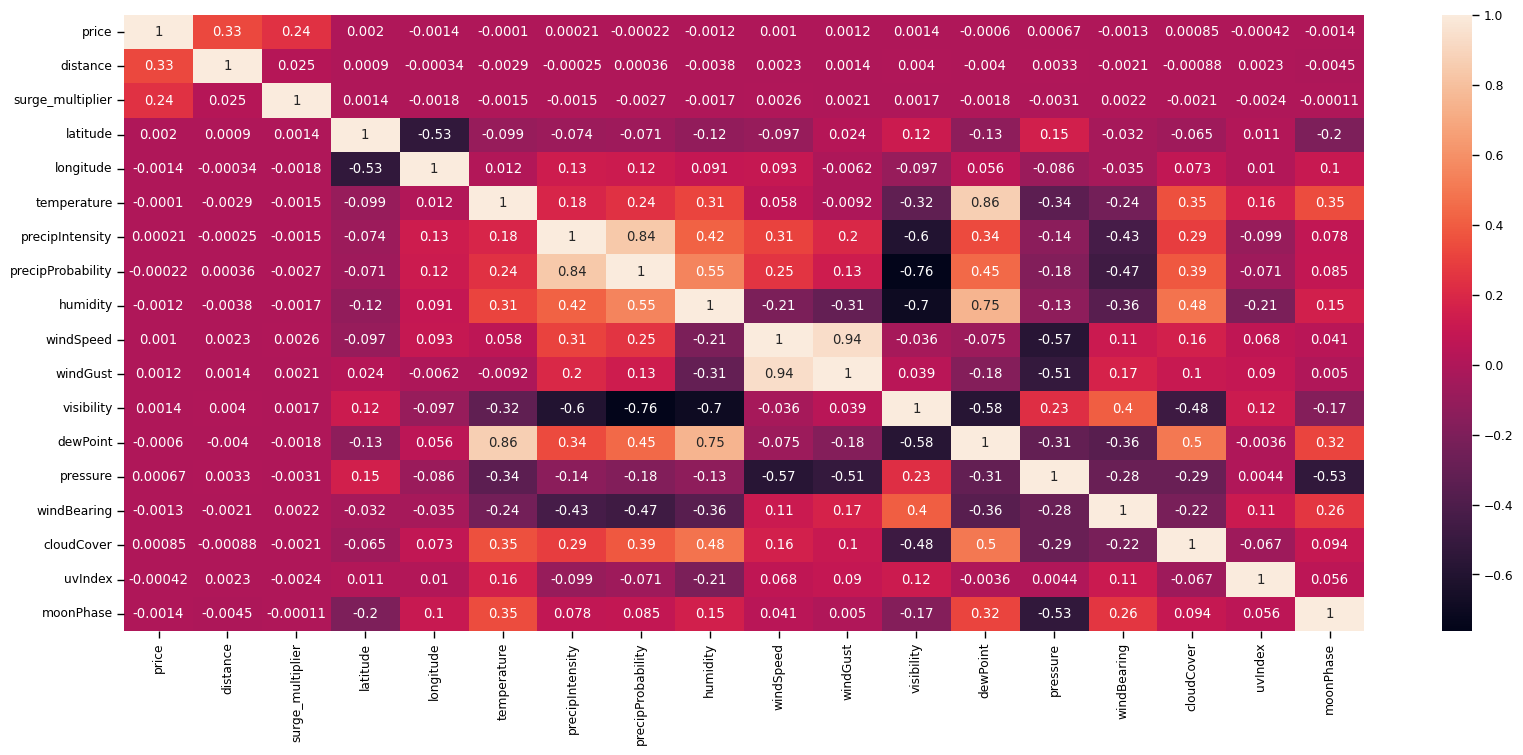

In [381]:
numerial_feature=['price','distance', 'surge_multiplier', 'latitude',
       'longitude', 'temperature','precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
        'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'moonPhase']
df_temp=new_df[numerial_feature]
plt.figure(figsize=(20,8))
sns.heatmap(df_temp.corr(),annot=True)

In [382]:
new_df=new_df.drop(['latitude','longitude', 'temperature','precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
        'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'moonPhase'],axis=1)


In [383]:
new_df.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon,day_name,day_night,price_per_mile,will_rain
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night,Sunday,Afternoon,11.363636,No
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain,Tuesday,Morning,25.000000,Yes
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night,Wednesday,Morning,15.909091,No
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night,Friday,Morning,59.090909,No
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night,Thursday,Morning,20.454545,No


#### Remove Categorial Features

In [384]:
new_cat=['source','destination','name','cab_type','short_summary','icon','price','will_rain']
df_cat=df[new_cat]
df_cat.head()

,source,destination,name,cab_type,short_summary,icon,price,will_rain
0,Haymarket Square,North Station,Shared,Lyft,Mostly Cloudy,partly-cloudy-night,5.0,No
1,Haymarket Square,North Station,Lux,Lyft,Rain,rain,11.0,Yes
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0,No
3,Haymarket Square,North Station,Lux Black XL,Lyft,Clear,clear-night,26.0,No
4,Haymarket Square,North Station,Lyft XL,Lyft,Partly Cloudy,partly-cloudy-night,9.0,No


In [385]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_cat_encode=df_cat.copy()
for i in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[i]=le.fit_transform(df_cat_encode[i])

df_cat_encode.head()

,source,destination,name,cab_type,short_summary,icon,price,will_rain
0,5,7,7,0,4,5,5.0,0
1,5,7,2,0,8,6,11.0,1
2,5,7,5,0,0,1,7.0,0
3,5,7,4,0,0,1,26.0,0
4,5,7,6,0,6,5,9.0,0


<Axes: >

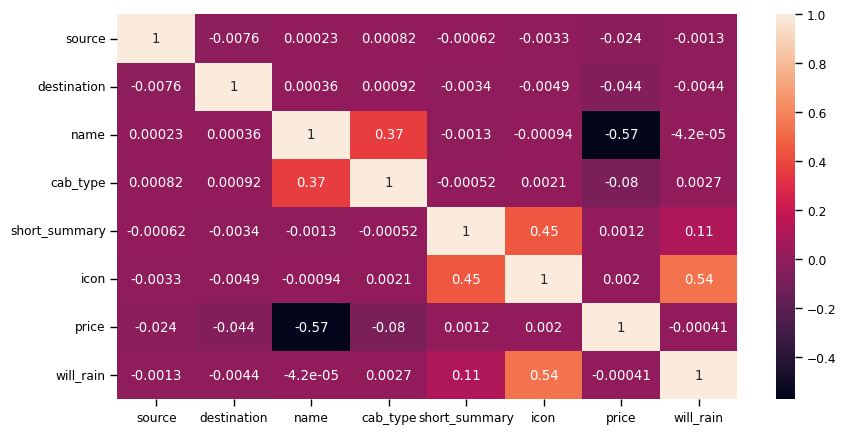

In [386]:
plt.figure(figsize=(10,5))
sns.heatmap(df_cat_encode.corr(),annot=True)

In [387]:
new_df=new_df.drop(['source','short_summary','icon','will_rain'],axis=1)

In [388]:
new_df.head()

,hour,day,month,datetime,destination,cab_type,name,price,distance,surge_multiplier,day_name,day_night,price_per_mile
0,9,16,12,2018-12-16 09:30:07,North Station,Lyft,Shared,5.0,0.44,1.0,Sunday,Afternoon,11.363636
1,2,27,11,2018-11-27 02:00:23,North Station,Lyft,Lux,11.0,0.44,1.0,Tuesday,Morning,25.000000
2,1,28,11,2018-11-28 01:00:22,North Station,Lyft,Lyft,7.0,0.44,1.0,Wednesday,Morning,15.909091
3,4,30,11,2018-11-30 04:53:02,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Friday,Morning,59.090909
4,3,29,11,2018-11-29 03:49:20,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Thursday,Morning,20.454545


In [389]:
new_df=new_df.drop(['month','datetime','day_name','day_night','price_per_mile'],axis=1)

In [390]:
new_df.head()
new_df.shape

(691577, 8)

### 2. Removing Outliers

In [391]:
q3=new_df['price'].quantile(0.75)
q1=new_df['price'].quantile(0.25)
iqr=q3-q1

In [392]:
new_df1=new_df[(new_df['price']<=q3+1.5*iqr)&(new_df['price']>=q1-1.5*iqr)]
new_df1.head()
new_df1.shape

(683597, 8)

### 3. One-hot encoding

In [393]:
one_hot_cols=pd.get_dummies(df['name'])
one_hot_cols

,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,Taxi,UberPool,UberX,UberXL,WAV
0,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,False,False,False,False,False,False,False,False,False,False,False,True,False
693067,False,False,False,False,False,False,False,False,False,False,True,False,False
693068,False,False,False,False,False,False,False,False,True,False,False,False,False
693069,False,True,False,False,False,False,False,False,False,False,False,False,False


In [394]:
def one_hot_encoder(data,feature,keep_first=True):
    one_hot_cols=pd.get_dummies(data[feature]).astype(int)
    for i in one_hot_cols.columns:
        one_hot_cols.rename({i:f'{feature}_'+i},axis=1,inplace=True)
    new_data=pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [395]:
new_df_onehot=new_df1.copy()
for col in new_df_onehot.select_dtypes(include='O').columns:
    new_df_onehot=one_hot_encoder(new_df_onehot,col)
new_df_onehot.head()

,hour,day,price,distance,surge_multiplier,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,...,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,9,16,5.0,0.44,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,27,11.0,0.44,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,28,7.0,0.44,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,30,26.0,0.44,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,3,29,9.0,0.44,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### 4. Dataset Split

In [396]:
X=new_df_onehot.drop('price',axis=1)
y=new_df_onehot['price']

In [397]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [398]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(478517, 31)
(205080, 31)
(478517,)
(205080,)


### 5. Model

#### ML Model - 1 Linear Regression

In [399]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [400]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [401]:
# Predict on the model
y_pred_train=lr.predict(X_train)
y_pred=lr.predict(X_test)

Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [402]:
# Metric Score chart for train
n=X_train.shape[0]
p=X_train.shape[1]
r2_train=r2_score(y_train,y_pred_train)
adj_r2_train=1 - (1 - r2_train) * ((n - 1) / (n - p - 1)) 
mse_train=mean_squared_error(y_train,y_pred_train)
rmse_train=np.sqrt(mse_train)
mae_train=mean_absolute_error(y_train,y_pred_train)

In [403]:
# Metric Score chart for test
n=X_train.shape[0]
p=X_train.shape[1]
r2_test=r2_score(y_test,y_pred)
adj_r2_test = 1 - (1 - r2_test) * ((n - 1) / (n - p - 1)) 
mse_test=mean_squared_error(y_test,y_pred)
rmse_test=np.sqrt(mse_test)
mae_test=mean_absolute_error(y_test,y_pred)

In [404]:
data = [
    {
        'Model': 'Linear_Regression',
        'R2_train': r2_train,
        'R2_test': r2_test, 
        'Adjusted_R2_train': adj_r2_train,
        'Adjusted_R2_test': adj_r2_test,
        'MAE_train': mae_train,
        'MAE_test': mae_test,
        'RMSE_train': rmse_train,
        'RMSE_test': rmse_test
    }
]
result = pd.DataFrame(data)
result

,Model,R2_train,R2_test,Adjusted_R2_train,Adjusted_R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
0,Linear_Regression,0.923436,0.923043,0.923431,0.923038,1.693781,1.695227,2.292875,2.297577


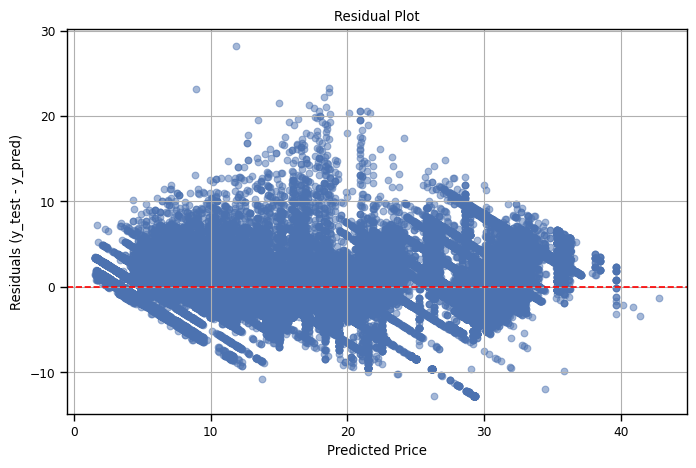

In [405]:
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (y_test - y_pred)")
plt.title("Residual Plot")
plt.grid(True)


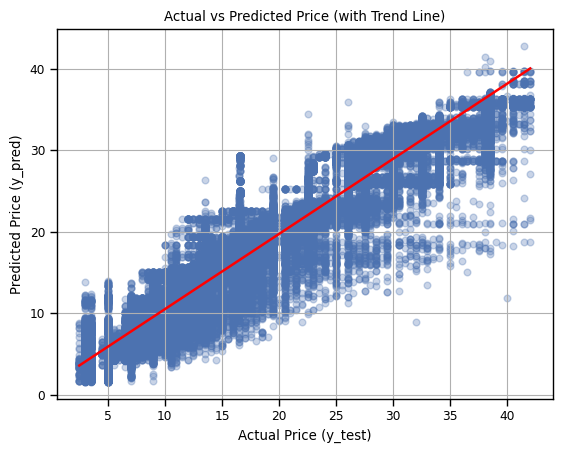

In [406]:
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("Actual Price (y_test)")
plt.ylabel("Predicted Price (y_pred)")
plt.title("Actual vs Predicted Price (with Trend Line)")
plt.grid(True)



#### ML Model - 2 Random Forest Regressor

In [407]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [408]:
y_pred_train2 = rf_model.predict(X_train)
y_pred2 = rf_model.predict(X_test)

In [409]:
# Metric Score chart for train
n=X_train.shape[0]
p=X_train.shape[1]
r2_train2=r2_score(y_train,y_pred_train2)
adj_r2_train2=1 - (1 - r2_train2) * ((n - 1) / (n - p - 1)) 
mse_train2=mean_squared_error(y_train,y_pred_train2)
rmse_train2=np.sqrt(mse_train2)
mae_train2=mean_absolute_error(y_train,y_pred_train2)

In [410]:
# Metric Score chart for test
n=X_train.shape[0]
p=X_train.shape[1]
r2_test2=r2_score(y_test,y_pred)
adj_r2_test2 = 1 - (1 - r2_test) * ((n - 1) / (n - p - 1)) 
mse_test2=mean_squared_error(y_test,y_pred2)
rmse_test2=np.sqrt(mse_test2)
mae_test2=mean_absolute_error(y_test,y_pred2)

In [411]:
new_row = {
        'Model': 'RandomForestRegressor',
        'R2_train': r2_train2,
        'R2_test': r2_test2, 
        'Adjusted_R2_train': adj_r2_train2,
        'Adjusted_R2_test': adj_r2_test2,
        'MAE_train': mae_train2,
        'MAE_test': mae_test2,
        'RMSE_train': rmse_train2,
        'RMSE_test': rmse_test2
    }
new_row=pd.DataFrame([new_row])
result = pd.concat([result,new_row],axis=0)
result

,Model,R2_train,R2_test,Adjusted_R2_train,Adjusted_R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
0,Linear_Regression,0.923436,0.923043,0.923431,0.923038,1.693781,1.695227,2.292875,2.297577
0,RandomForestRegressor,0.989498,0.923043,0.989497,0.923038,0.491573,1.036298,0.849190,1.658560


#### ML Model - 3 XgBoost Regressor

In [412]:
xg_model = XGBRegressor(objective= 'reg:squarederror')
xg_models=xg_model.fit(X_train,y_train)

y_pred_train3 = xg_models.predict(X_train)
y_pred3 = xg_models.predict(X_test)

In [413]:
# Metric Score chart for train
n=X_train.shape[0]
p=X_train.shape[1]
r2_train3=r2_score(y_train,y_pred_train3)
adj_r2_train3=1 - (1 - r2_train2) * ((n - 1) / (n - p - 1)) 
mse_train3=mean_squared_error(y_train,y_pred_train3)
rmse_train3=np.sqrt(mse_train3)
mae_train3=mean_absolute_error(y_train,y_pred_train3)

In [414]:
# Metric Score chart for test
n=X_train.shape[0]
p=X_train.shape[1]
r2_test3=r2_score(y_test,y_pred3)
adj_r2_test3 = 1 - (1 - r2_test) * ((n - 1) / (n - p - 1)) 
mse_test3=mean_squared_error(y_test,y_pred3)
rmse_test3=np.sqrt(mse_test3)
mae_test3=mean_absolute_error(y_test,y_pred3)

In [415]:
new_row = {
        'Model': 'XGBRegressor',
        'R2_train': r2_train3,
        'R2_test': r2_test3, 
        'Adjusted_R2_train': adj_r2_train3,
        'Adjusted_R2_test': adj_r2_test3,
        'MAE_train': mae_train3,
        'MAE_test': mae_test3,
        'RMSE_train': rmse_train3,
        'RMSE_test': rmse_test3
    }
new_row=pd.DataFrame([new_row])
result = pd.concat([result,new_row],axis=0)
result

,Model,R2_train,R2_test,Adjusted_R2_train,Adjusted_R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
0,Linear_Regression,0.923436,0.923043,0.923431,0.923038,1.693781,1.695227,2.292875,2.297577
0,RandomForestRegressor,0.989498,0.923043,0.989497,0.923038,0.491573,1.036298,0.849190,1.658560
0,XGBRegressor,0.967689,0.966442,0.989497,0.923038,0.967388,0.980772,1.489505,1.517205


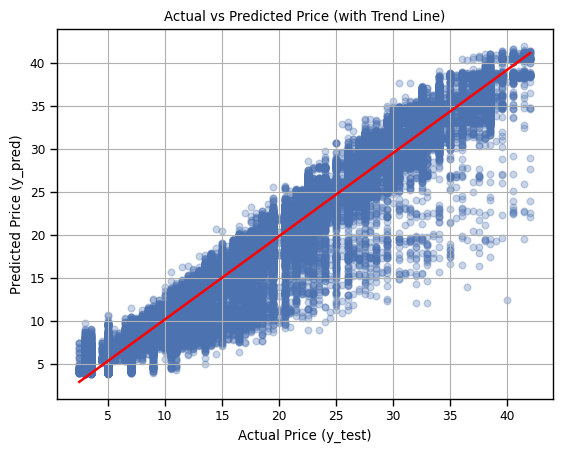

In [416]:
sns.regplot(x=y_test, y=y_pred3, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("Actual Price (y_test)")
plt.ylabel("Predicted Price (y_pred)")
plt.title("Actual vs Predicted Price (with Trend Line)")
plt.grid(True)


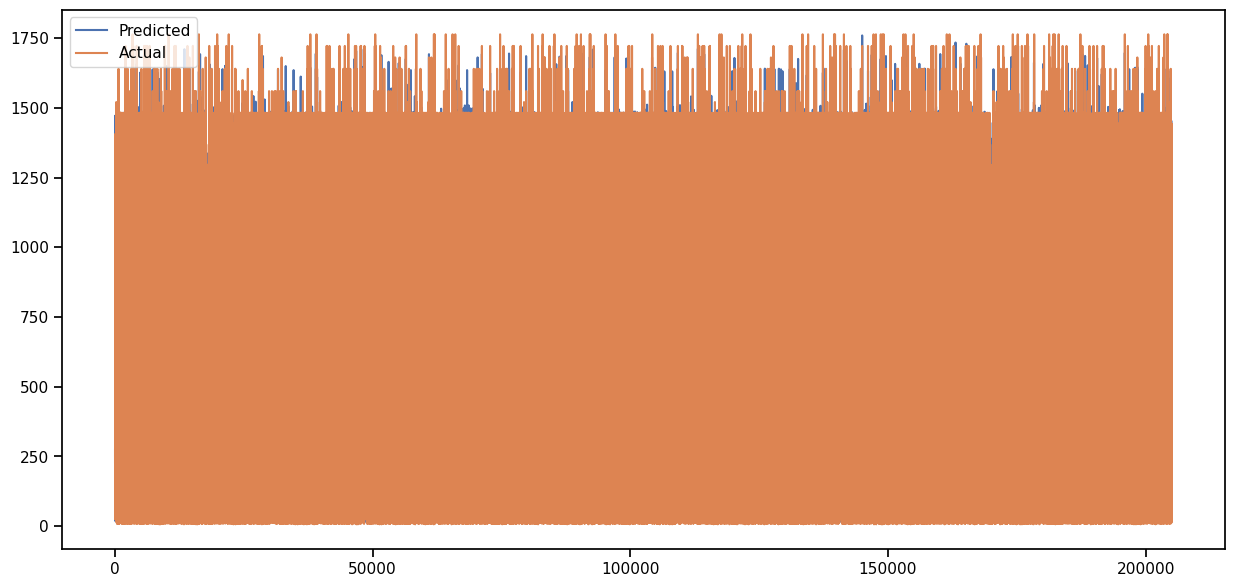

In [417]:
#Visualization 
# Plot between actual target variable vs Predicted one
sns.set_context("notebook");
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred3))
plt.plot(np.array(np.square(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()